In [178]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

#seaborn
import seaborn as sns

#json
import json

In [148]:
os.chdir("/Users/eleonoracocciu/Desktop/Unipi/Data mining_fundamentals/K-means_clustering")

In [149]:
df = pd.read_csv("Numerical_Normalized_Train_HR_Employee_Attrition.csv")

In [150]:
df.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,Attrition,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education
0,0.809524,0.285714,0.286171,0.428571,0.000000,0.333333,0.40,0.4375,0.231122,0.0,0.0,0.333333,0.50,1.000000,0.75
1,0.428571,0.000000,0.147183,0.214286,0.333333,0.500000,0.05,0.5000,0.233476,0.0,1.0,0.333333,1.00,0.111111,0.00
2,0.166667,0.535714,0.144644,1.000000,0.333333,0.666667,0.05,0.3125,0.747017,0.0,1.0,0.666667,0.25,0.111111,0.50
3,0.357143,0.142857,0.068878,0.214286,0.000000,0.166667,0.15,0.4375,0.435214,0.0,0.0,0.333333,0.00,0.222222,0.75
4,0.309524,0.285714,0.204325,0.071429,0.000000,0.333333,0.50,0.1250,0.142192,0.0,0.0,0.666667,0.00,0.111111,0.25


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   Attrition              883 non-null    float64
 10  OverTime               883 non-null    float64
 11  OverallSatisfaction    883 non-null    float64
 12  JobLevel               883 non-null    float64
 13  NumCompaniesWorked     883 non-null    float64
 14  Education              883 non-null    float64
dtypes: flo

<h3>Feature selection</h3>

In [152]:
df_copy = pd.DataFrame()

columns_to_add = ['Attrition', 'OverTime', 'Age', 'MonthlyHours', 'MonthlyIncome', 'JobLevel', 'YearsAtCompany', 
                'OverallSatisfaction', 'YearsInCurrentRole']

for element in columns_to_add:
    df_copy[element] = df[element]
    
df_copy

,Attrition,OverTime,Age,MonthlyHours,MonthlyIncome,JobLevel,YearsAtCompany,OverallSatisfaction,YearsInCurrentRole
0,0.0,0.0,0.809524,0.231122,0.286171,0.50,0.40,0.333333,0.4375
1,0.0,1.0,0.428571,0.233476,0.147183,1.00,0.05,0.333333,0.5000
2,0.0,1.0,0.166667,0.747017,0.144644,0.25,0.05,0.666667,0.3125
3,0.0,0.0,0.357143,0.435214,0.068878,0.00,0.15,0.333333,0.4375
4,0.0,0.0,0.309524,0.142192,0.204325,0.00,0.50,0.666667,0.1250
...,...,...,...,...,...,...,...,...,...
878,1.0,0.0,0.476190,0.453907,0.166769,0.00,0.50,0.666667,0.0000
879,0.0,1.0,0.452381,0.088947,0.042558,0.00,0.85,0.666667,0.0000
880,1.0,1.0,0.357143,0.436931,0.159227,0.25,0.55,0.333333,0.4375
881,0.0,0.0,0.357143,0.323273,0.057373,0.25,0.15,0.333333,0.1250


In [153]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Attrition            883 non-null    float64
 1   OverTime             883 non-null    float64
 2   Age                  883 non-null    float64
 3   MonthlyHours         883 non-null    float64
 4   MonthlyIncome        883 non-null    float64
 5   JobLevel             883 non-null    float64
 6   YearsAtCompany       883 non-null    float64
 7   OverallSatisfaction  883 non-null    float64
 8   YearsInCurrentRole   883 non-null    float64
dtypes: float64(9)
memory usage: 62.2 KB


In [154]:
df_copy.describe()

,Attrition,OverTime,Age,MonthlyHours,MonthlyIncome,JobLevel,YearsAtCompany,OverallSatisfaction,YearsInCurrentRole
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,0.173273,0.277463,0.441784,0.368545,0.227927,0.229898,0.316308,0.440921,0.244975
std,0.378698,0.448001,0.196813,0.230461,0.209842,0.251877,0.226178,0.178532,0.214712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.285714,0.185135,0.079383,0.000000,0.150000,0.333333,0.125000
50%,0.000000,0.000000,0.404762,0.329663,0.156611,0.250000,0.250000,0.333333,0.187500
75%,0.000000,1.000000,0.571429,0.502469,0.301351,0.250000,0.450000,0.666667,0.437500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [155]:
# Convert the DataFrame to a numpy array:
train_data = df_copy.values

In [156]:
train_data

array([[0.        , 0.        , 0.80952381, ..., 0.4       , 0.33333333,
        0.4375    ],
       [0.        , 1.        , 0.42857143, ..., 0.05      , 0.33333333,
        0.5       ],
       [0.        , 1.        , 0.16666667, ..., 0.05      , 0.66666667,
        0.3125    ],
       ...,
       [1.        , 1.        , 0.35714286, ..., 0.55      , 0.33333333,
        0.4375    ],
       [0.        , 0.        , 0.35714286, ..., 0.15      , 0.33333333,
        0.125     ],
       [0.        , 1.        , 0.64285714, ..., 0.5       , 0.33333333,
        0.25      ]])

In [157]:
type(train_data)

numpy.ndarray

<h3>K-means (first try)</h3>

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.92120951014877 silhouette =  0.2562863748237707

k =  6 SSE =  235.1518672650916 silhouette =  0.24396377397365335

k =  7 SSE =  222.35951871388588 silhouette =  0.23325151678370143

k =  8 SSE =  214.2835986526157 silhouette =  0.20523347478480652

k =  9 SSE =  201.46393386824477 silhouette =  0.2377767022252713

k =  10 SSE =  194.50518800469985 silhouette =  0.19497816505455148

k =  11 SSE =  189.55937387693146 silhouette =  0.18663281332942053

k =  12 SSE =  181.9262866312806 silhouette =  0.19820936561237534

k =  13 SSE =  177.79916403511527 silhouette =  0.19033334826197265

k =  14 SSE =  172.0418812599814 silhouette =  0.20006412476603697

k =  15 SSE =  168.02572398322252 silhouette =  0.1830285975483321

k =  16 SSE =  165.01285356491564 silhouette =  0.1

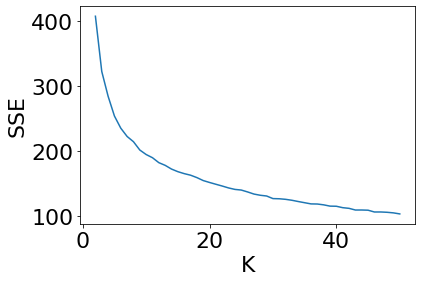

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.85505689337919 silhouette =  0.2582887391879656

k =  6 SSE =  235.15391092281124 silhouette =  0.2452852070816758

k =  7 SSE =  222.3604168031604 silhouette =  0.2340117950686438

k =  8 SSE =  209.92648165410358 silhouette =  0.23937625179593192

k =  9 SSE =  201.61655312786587 silhouette =  0.20265819490559486

k =  10 SSE =  193.2329920910917 silhouette =  0.20579485080742993

k =  11 SSE =  188.10859056246417 silhouette =  0.20271892170163058

k =  12 SSE =  181.76563067397083 silhouette =  0.20299399915086938

k =  13 SSE =  177.56219335196604 silhouette =  0.18870730606650366

k =  14 SSE =  172.59065359680977 silhouette =  0.18679040842324898

k =  15 SSE =  169.46698189289123 silhouette =  0.15780857832504644

k =  16 SSE =  164.52380442333725 silhouette =  0

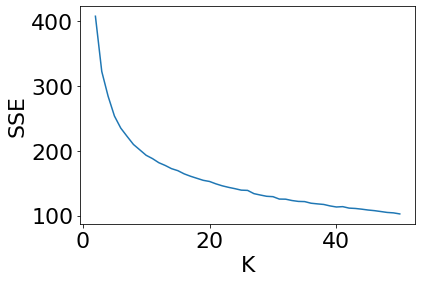

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8511421017981 silhouette =  0.2580574426860805

k =  6 SSE =  235.27885430653285 silhouette =  0.24124687505092382

k =  7 SSE =  222.36822651534612 silhouette =  0.23295099823508975

k =  8 SSE =  209.8024701987524 silhouette =  0.24026557361743925

k =  9 SSE =  202.2383278313524 silhouette =  0.23967310088493093

k =  10 SSE =  194.09065064948794 silhouette =  0.20315535917067593

k =  11 SSE =  188.09586101227745 silhouette =  0.1941692403763647

k =  12 SSE =  181.19301578751717 silhouette =  0.2065133748544533

k =  13 SSE =  177.31174802782382 silhouette =  0.19887770027842477

k =  14 SSE =  173.08614860152053 silhouette =  0.18428289495230432

k =  15 SSE =  167.91681628847056 silhouette =  0.18399483783796147

k =  16 SSE =  165.03092704815066 silhouette =  0.

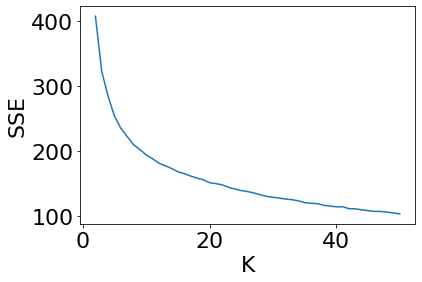

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.86148623731526 silhouette =  0.2571027381218776

k =  6 SSE =  235.15138489672603 silhouette =  0.24455243999269413

k =  7 SSE =  222.33230687827802 silhouette =  0.23455376734267674

k =  8 SSE =  213.24916336420267 silhouette =  0.23165866502113844

k =  9 SSE =  201.50558347535974 silhouette =  0.24048869068121506

k =  10 SSE =  193.2095784000725 silhouette =  0.20412110223036004

k =  11 SSE =  188.73768329486163 silhouette =  0.20423704473163107

k =  12 SSE =  182.22671339913194 silhouette =  0.199129643559244

k =  13 SSE =  177.72929593307208 silhouette =  0.2009670914578837

k =  14 SSE =  171.75571616520432 silhouette =  0.19679418093517165

k =  15 SSE =  169.6282146823506 silhouette =  0.19332054533153567

k =  16 SSE =  166.01777741269868 silhouette =  0.

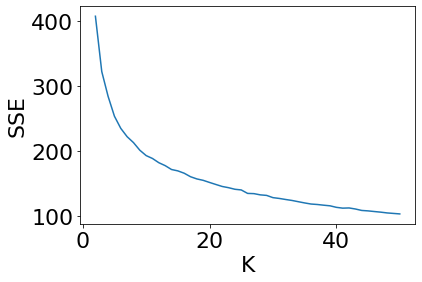

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.92120951014877 silhouette =  0.2562863748237707

k =  6 SSE =  235.1534162776384 silhouette =  0.24490477051543363

k =  7 SSE =  222.32942814604056 silhouette =  0.23451130292962866

k =  8 SSE =  209.82642000166769 silhouette =  0.2383772415240269

k =  9 SSE =  201.5147603717429 silhouette =  0.23565793065808757

k =  10 SSE =  193.20466340469176 silhouette =  0.2026771582725511

k =  11 SSE =  187.26954376187234 silhouette =  0.2083088751579994

k =  12 SSE =  183.6046989655226 silhouette =  0.1987074364171026

k =  13 SSE =  175.98402049955033 silhouette =  0.1988345000563197

k =  14 SSE =  173.05415020932008 silhouette =  0.19399156625074362

k =  15 SSE =  169.41741076223718 silhouette =  0.18714532570029488

k =  16 SSE =  165.21620401818586 silhouette =  0.183

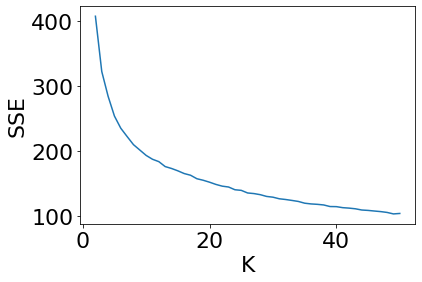

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  292.00770616066313 silhouette =  0.22441247151038116

k =  5 SSE =  253.8537267511618 silhouette =  0.2582426033198488

k =  6 SSE =  235.15669395487365 silhouette =  0.24538538344488164

k =  7 SSE =  222.3604786597769 silhouette =  0.23333757661445303

k =  8 SSE =  209.80240168092104 silhouette =  0.24033086140107482

k =  9 SSE =  201.38000449789095 silhouette =  0.23996715090794415

k =  10 SSE =  193.2684842304706 silhouette =  0.2043817686072235

k =  11 SSE =  187.1356384735601 silhouette =  0.20387652111242424

k =  12 SSE =  183.2016998742845 silhouette =  0.1911305443297528

k =  13 SSE =  179.17966006817622 silhouette =  0.18283932979515857

k =  14 SSE =  174.3807018655413 silhouette =  0.1897824689697404

k =  15 SSE =  168.1006699279556 silhouette =  0.18425883928765865

k =  16 SSE =  164.33531051285604 silhouette =  0.18108

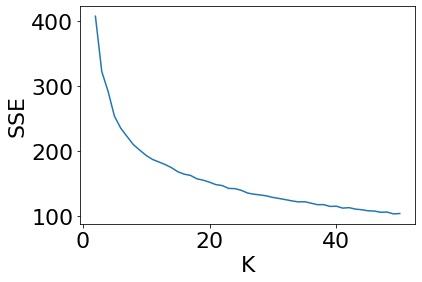

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.86148623731526 silhouette =  0.2571027381218776

k =  6 SSE =  235.15075219880185 silhouette =  0.24417421607126805

k =  7 SSE =  222.54549243658448 silhouette =  0.24756184220270025

k =  8 SSE =  214.14685949339776 silhouette =  0.19371359520039033

k =  9 SSE =  201.5729842298993 silhouette =  0.20115666747638197

k =  10 SSE =  193.21452534227126 silhouette =  0.20488349679091983

k =  11 SSE =  187.8792902961194 silhouette =  0.2061085503940671

k =  12 SSE =  181.45619669687633 silhouette =  0.2008779583150721

k =  13 SSE =  178.562206887875 silhouette =  0.1995602107013637

k =  14 SSE =  172.30239862742047 silhouette =  0.1997392451278043

k =  15 SSE =  168.98706571313397 silhouette =  0.15479128671560186

k =  16 SSE =  165.33872731707262 silhouette =  0.162

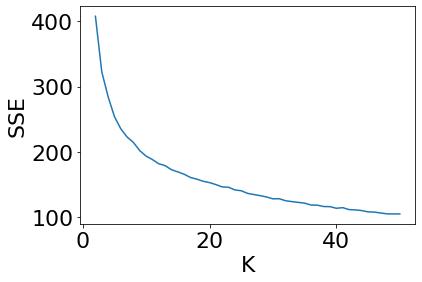

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.86148623731526 silhouette =  0.2571027381218776

k =  6 SSE =  235.15138489672603 silhouette =  0.24455243999269413

k =  7 SSE =  222.35876446102378 silhouette =  0.23452617075454718

k =  8 SSE =  209.81542310250052 silhouette =  0.23845754483757564

k =  9 SSE =  201.70595256258864 silhouette =  0.20701587059437368

k =  10 SSE =  193.33566288473125 silhouette =  0.2092001059625622

k =  11 SSE =  187.24715702865595 silhouette =  0.20064565187156444

k =  12 SSE =  183.35535754449384 silhouette =  0.18663116928872875

k =  13 SSE =  178.86409148669196 silhouette =  0.18375765208578973

k =  14 SSE =  173.87281306989655 silhouette =  0.18063504908843928

k =  15 SSE =  168.1909101688251 silhouette =  0.20093899444806912

k =  16 SSE =  164.82684262406264 silhouette = 

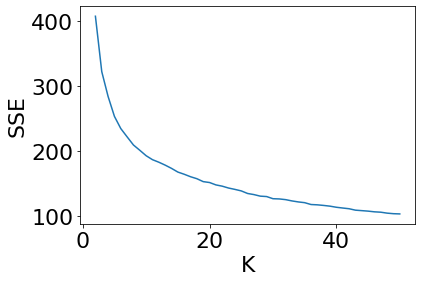

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.27794872793356 silhouette =  0.2409144250310434

k =  7 SSE =  222.35876446102378 silhouette =  0.23452617075454718

k =  8 SSE =  209.83475421396855 silhouette =  0.24096413727880756

k =  9 SSE =  201.64269116168248 silhouette =  0.20600475190998424

k =  10 SSE =  194.363006989939 silhouette =  0.2057575233140534

k =  11 SSE =  187.15351091459306 silhouette =  0.2019338175890017

k =  12 SSE =  182.22398823768827 silhouette =  0.20410557788864933

k =  13 SSE =  177.5299877845534 silhouette =  0.20187904607017834

k =  14 SSE =  172.3803024592542 silhouette =  0.18045914002051036

k =  15 SSE =  168.69614652367045 silhouette =  0.18031107514627917

k =  16 SSE =  164.85673675578605 silhouette =  0.1832

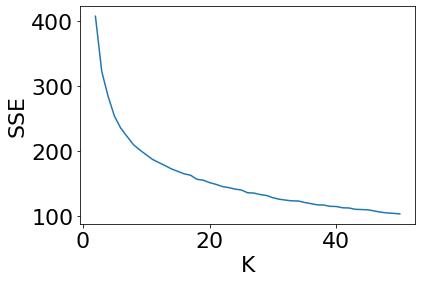

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.15480897268338 silhouette =  0.24530429105710072

k =  7 SSE =  222.97477477604156 silhouette =  0.23737667371065072

k =  8 SSE =  209.81770155403143 silhouette =  0.24051943483145516

k =  9 SSE =  201.4745520706198 silhouette =  0.23858400669594126

k =  10 SSE =  193.16920687466973 silhouette =  0.20305452222116213

k =  11 SSE =  187.43601417911287 silhouette =  0.19480001419844653

k =  12 SSE =  181.44344199984135 silhouette =  0.20166032849994214

k =  13 SSE =  177.36330391123533 silhouette =  0.18566489531153388

k =  14 SSE =  172.76573532949718 silhouette =  0.185998026926953

k =  15 SSE =  169.20025308643022 silhouette =  0.1798720579683795

k =  16 SSE =  166.64997882469643 silhouette =  0.1

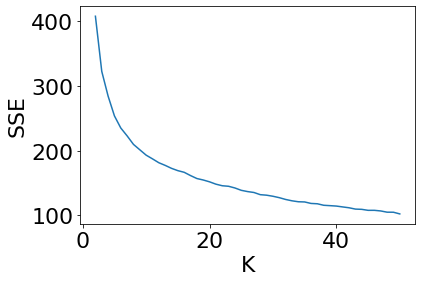

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.15158114495037 silhouette =  0.2437566182246464

k =  7 SSE =  222.35491761604948 silhouette =  0.23490809915265007

k =  8 SSE =  209.87773708314228 silhouette =  0.24044090324117745

k =  9 SSE =  201.71731854361306 silhouette =  0.2050493087458025

k =  10 SSE =  193.31654874414787 silhouette =  0.19954921015190744

k =  11 SSE =  187.39612868439514 silhouette =  0.20641897477641047

k =  12 SSE =  182.4616668054164 silhouette =  0.1952280532113772

k =  13 SSE =  178.18716892601378 silhouette =  0.18577897340587224

k =  14 SSE =  172.55377571400427 silhouette =  0.20119008940224742

k =  15 SSE =  168.71382990278647 silhouette =  0.1569919802189314

k =  16 SSE =  165.62129248721607 silhouette =  0.17

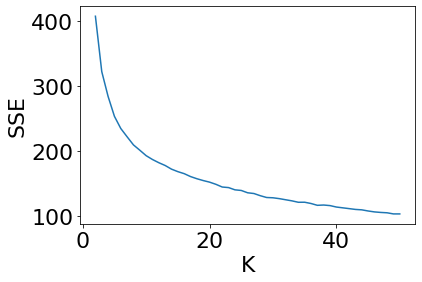

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.86538813578264 silhouette =  0.2572656510055693

k =  6 SSE =  235.15305316403004 silhouette =  0.24406874931727127

k =  7 SSE =  223.3054624597777 silhouette =  0.23811879736058209

k =  8 SSE =  209.81938794690225 silhouette =  0.24071060326430968

k =  9 SSE =  201.41454625532796 silhouette =  0.23830923104603205

k =  10 SSE =  193.38738278389133 silhouette =  0.21058626945227685

k =  11 SSE =  187.85448121973897 silhouette =  0.20424708845103332

k =  12 SSE =  181.81967850394204 silhouette =  0.20204157658364216

k =  13 SSE =  177.5155173939371 silhouette =  0.2038431248436741

k =  14 SSE =  173.3487143481343 silhouette =  0.18487385813497703

k =  15 SSE =  169.59757036112623 silhouette =  0.17129931133578424

k =  16 SSE =  165.70593600874307 silhouette =  0

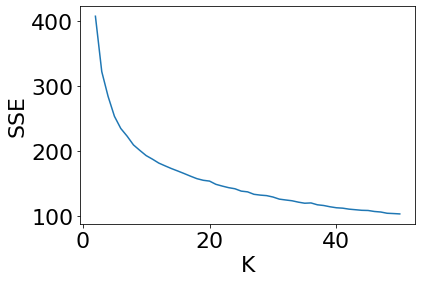

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  292.00880541852337 silhouette =  0.22461050752438705

k =  5 SSE =  253.92120951014877 silhouette =  0.2562863748237707

k =  6 SSE =  235.15391092281124 silhouette =  0.2452852070816758

k =  7 SSE =  222.3454056170683 silhouette =  0.23394213535495842

k =  8 SSE =  209.8252611930192 silhouette =  0.23824340593364896

k =  9 SSE =  201.57497638034164 silhouette =  0.2045502586613191

k =  10 SSE =  193.22755799889896 silhouette =  0.20472477108203738

k =  11 SSE =  187.55069398047542 silhouette =  0.20498818079864017

k =  12 SSE =  181.96867084186113 silhouette =  0.19644944536663342

k =  13 SSE =  177.50609805843527 silhouette =  0.18889915878819036

k =  14 SSE =  172.8892876851035 silhouette =  0.1726439966720954

k =  15 SSE =  169.22294144243943 silhouette =  0.17906834989782316

k =  16 SSE =  165.06467171758328 silhouette =  0.1

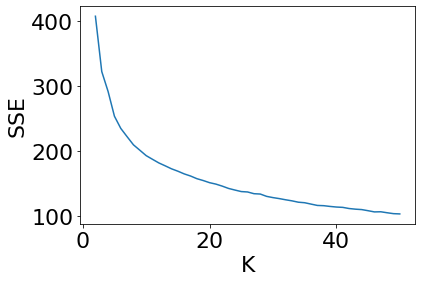

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.1534162776384 silhouette =  0.24490477051543363

k =  7 SSE =  222.34702837382994 silhouette =  0.23439296070375779

k =  8 SSE =  214.1468279143764 silhouette =  0.19460051510271448

k =  9 SSE =  201.65024219703108 silhouette =  0.20269772039957334

k =  10 SSE =  193.3791299740417 silhouette =  0.21169164237170637

k =  11 SSE =  187.48790806073185 silhouette =  0.20503221559478185

k =  12 SSE =  181.6407566569167 silhouette =  0.19462364981652217

k =  13 SSE =  177.57301137000815 silhouette =  0.19582293046489296

k =  14 SSE =  174.00098869827514 silhouette =  0.15684347737927523

k =  15 SSE =  168.3970604404935 silhouette =  0.17999261438376432

k =  16 SSE =  165.9280950111605 silhouette =  0.190

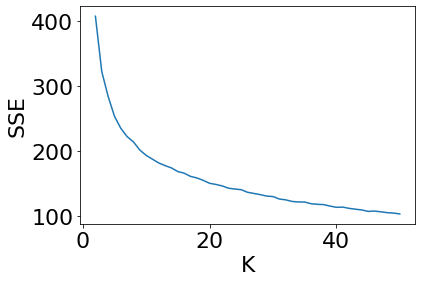

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8787510259347 silhouette =  0.25877654555620566

k =  6 SSE =  235.27794872793356 silhouette =  0.2409144250310434

k =  7 SSE =  222.32905615548492 silhouette =  0.23297212519183713

k =  8 SSE =  209.81041984010017 silhouette =  0.24063044478465445

k =  9 SSE =  201.6646006256353 silhouette =  0.20205463230815982

k =  10 SSE =  193.1305063085149 silhouette =  0.20525916789023113

k =  11 SSE =  187.5762166303444 silhouette =  0.20380486040502993

k =  12 SSE =  182.12969415972208 silhouette =  0.20119557273645747

k =  13 SSE =  178.08157791637257 silhouette =  0.17435396703072611

k =  14 SSE =  172.11778058616912 silhouette =  0.19634316664662355

k =  15 SSE =  169.10058812709616 silhouette =  0.18433933833016017

k =  16 SSE =  166.18945919151395 silhouette =  0

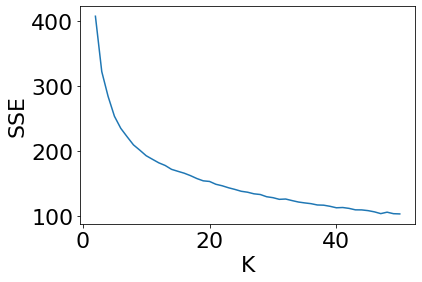

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.15158114495037 silhouette =  0.2437566182246464

k =  7 SSE =  222.4520495679617 silhouette =  0.23613379077426858

k =  8 SSE =  214.35741835272304 silhouette =  0.20759632133594288

k =  9 SSE =  201.40328663536351 silhouette =  0.23803540925904845

k =  10 SSE =  193.28603300239703 silhouette =  0.2054758330427997

k =  11 SSE =  187.7620763388005 silhouette =  0.20152574331437167

k =  12 SSE =  181.1478862195897 silhouette =  0.20518602183096823

k =  13 SSE =  177.310981590334 silhouette =  0.17961324083216554

k =  14 SSE =  173.53527624203133 silhouette =  0.1853527800264883

k =  15 SSE =  170.61501438458473 silhouette =  0.17572969671835434

k =  16 SSE =  165.13818235765132 silhouette =  0.19519

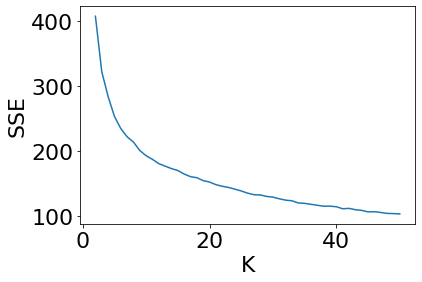

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.15158114495037 silhouette =  0.2437566182246464

k =  7 SSE =  222.42796074538043 silhouette =  0.23538708137378084

k =  8 SSE =  214.2663000898613 silhouette =  0.20261480355763067

k =  9 SSE =  201.52071456265838 silhouette =  0.23753250019890712

k =  10 SSE =  193.30800450128214 silhouette =  0.20122605697056398

k =  11 SSE =  187.912650047789 silhouette =  0.20076335938930262

k =  12 SSE =  183.25048751653102 silhouette =  0.18820127007348234

k =  13 SSE =  176.03096103499712 silhouette =  0.19735403174155544

k =  14 SSE =  172.66697475836986 silhouette =  0.19047904224792409

k =  15 SSE =  170.446913330923 silhouette =  0.1617371161787388

k =  16 SSE =  165.5807003390914 silhouette =  0.18049

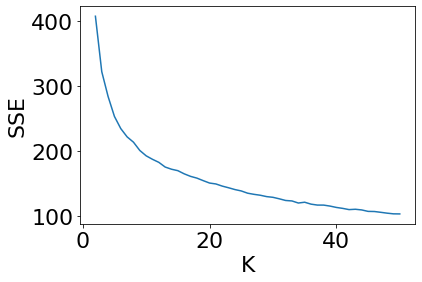

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  292.03641498371746 silhouette =  0.22465989229320385

k =  5 SSE =  253.85499799380148 silhouette =  0.2581035632721134

k =  6 SSE =  235.1992265451277 silhouette =  0.24537772473036074

k =  7 SSE =  222.33170751616348 silhouette =  0.23450030328939292

k =  8 SSE =  213.12422493537298 silhouette =  0.23058218727722118

k =  9 SSE =  201.4843804880239 silhouette =  0.239451635906592

k =  10 SSE =  194.03496010497446 silhouette =  0.20552500148158429

k =  11 SSE =  187.50268843979032 silhouette =  0.20265339462678195

k =  12 SSE =  181.26759641599838 silhouette =  0.20362990406662096

k =  13 SSE =  178.9927258515081 silhouette =  0.20122771053955482

k =  14 SSE =  174.4044039839969 silhouette =  0.1798544399469692

k =  15 SSE =  168.2172297626787 silhouette =  0.17914584119755209

k =  16 SSE =  164.82635541080646 silhouette =  0.180

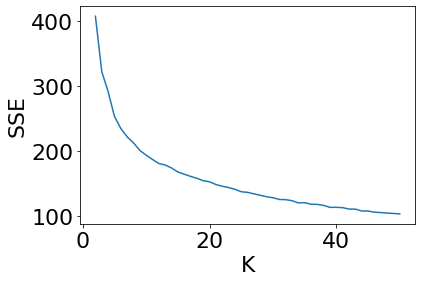

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.15480897268338 silhouette =  0.24530429105710072

k =  7 SSE =  222.43385153642933 silhouette =  0.23230811729344342

k =  8 SSE =  209.81961516296528 silhouette =  0.23818645625791085

k =  9 SSE =  202.9331995227584 silhouette =  0.2021379210120484

k =  10 SSE =  193.34669245143633 silhouette =  0.20734538667826397

k =  11 SSE =  187.42488688924655 silhouette =  0.20466068028407955

k =  12 SSE =  181.9681789623482 silhouette =  0.21040049102795697

k =  13 SSE =  177.26211866629006 silhouette =  0.18824113911056115

k =  14 SSE =  171.67699847337286 silhouette =  0.19878079305541807

k =  15 SSE =  168.98406132911816 silhouette =  0.20022635497557442

k =  16 SSE =  164.94170385706337 silhouette =  0.

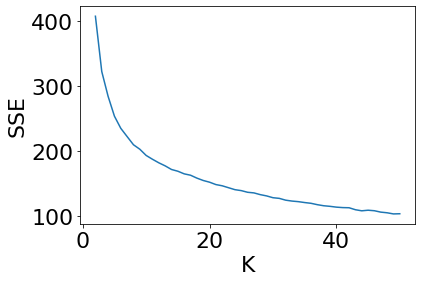

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.86148623731526 silhouette =  0.2571027381218776

k =  6 SSE =  235.32671741572196 silhouette =  0.2384559848853113

k =  7 SSE =  222.66587542525872 silhouette =  0.23307777053827725

k =  8 SSE =  209.81813819102024 silhouette =  0.23873762649460828

k =  9 SSE =  201.4768995612824 silhouette =  0.2392629854154956

k =  10 SSE =  194.10981925105878 silhouette =  0.20429922320351493

k =  11 SSE =  187.95638354143057 silhouette =  0.19383128865393376

k =  12 SSE =  181.2590868516858 silhouette =  0.20385034143746344

k =  13 SSE =  176.3488138772879 silhouette =  0.19719945832731509

k =  14 SSE =  172.58631021053884 silhouette =  0.19071026384446074

k =  15 SSE =  168.14538234772127 silhouette =  0.19766807978530065

k =  16 SSE =  165.49783473253123 silhouette =  0.

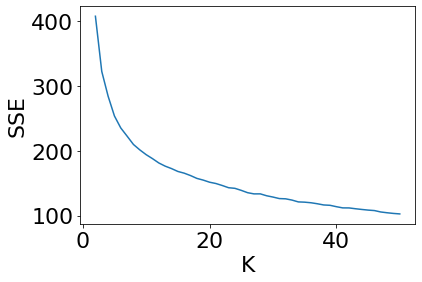

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.85997286897404 silhouette =  0.258200201663266

k =  6 SSE =  235.15391092281124 silhouette =  0.2452852070816758

k =  7 SSE =  222.477202306301 silhouette =  0.24898679696353013

k =  8 SSE =  209.78217518960767 silhouette =  0.23873169697740992

k =  9 SSE =  201.615857312678 silhouette =  0.20433136350897127

k =  10 SSE =  193.18597085784364 silhouette =  0.2033416991829039

k =  11 SSE =  187.80830026901648 silhouette =  0.20022956270345227

k =  12 SSE =  181.90400451620096 silhouette =  0.20118078720548313

k =  13 SSE =  177.807929186976 silhouette =  0.1902417524715113

k =  14 SSE =  171.90756178390492 silhouette =  0.19601236498476113

k =  15 SSE =  169.36360885411096 silhouette =  0.1810272902900492

k =  16 SSE =  164.86942489118076 silhouette =  0.183474

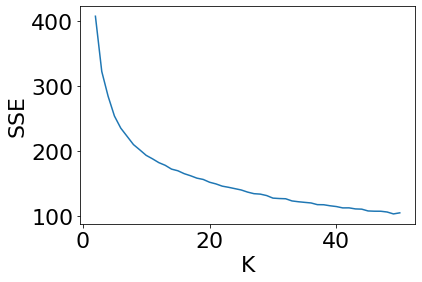

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.15245325793205 silhouette =  0.2453547809761672

k =  7 SSE =  222.59423392822146 silhouette =  0.24806826498053988

k =  8 SSE =  214.15472921888278 silhouette =  0.1946761691267318

k =  9 SSE =  205.12874113115922 silhouette =  0.1940924814591899

k =  10 SSE =  194.08905855029306 silhouette =  0.20112724025132842

k =  11 SSE =  187.38381400111433 silhouette =  0.20400117521034739

k =  12 SSE =  181.63663906519938 silhouette =  0.195515967691467

k =  13 SSE =  177.64671784980547 silhouette =  0.19995179949622754

k =  14 SSE =  172.92824891214715 silhouette =  0.1693428734544012

k =  15 SSE =  168.20261670487565 silhouette =  0.19611828684649604

k =  16 SSE =  164.71072450416162 silhouette =  0.183

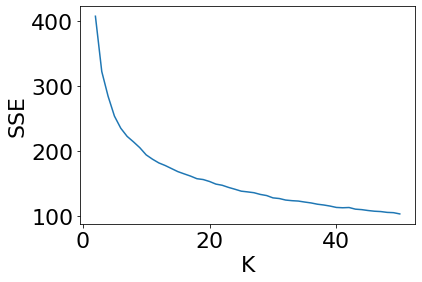

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.15305316403004 silhouette =  0.24406874931727127

k =  7 SSE =  222.35690896403327 silhouette =  0.23355884003389185

k =  8 SSE =  213.4235065015825 silhouette =  0.23249703358257656

k =  9 SSE =  201.44304320000853 silhouette =  0.23669026477237273

k =  10 SSE =  194.5961767093027 silhouette =  0.20278416100051

k =  11 SSE =  188.5076493721586 silhouette =  0.20315514018996866

k =  12 SSE =  181.2740958775895 silhouette =  0.20222707215581662

k =  13 SSE =  177.7399007876975 silhouette =  0.20045064213176264

k =  14 SSE =  172.7862021115789 silhouette =  0.17266447476205032

k =  15 SSE =  168.85401569615544 silhouette =  0.1867599521191101

k =  16 SSE =  166.25887669468327 silhouette =  0.1753993

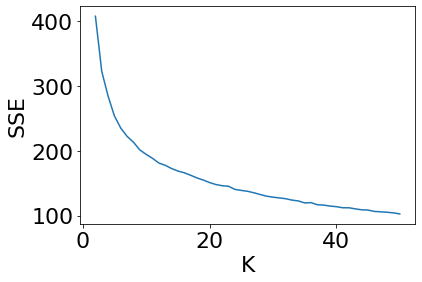

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8533986789444 silhouette =  0.2581035632721134

k =  6 SSE =  235.15341627763834 silhouette =  0.24490477051543363

k =  7 SSE =  222.39852772955186 silhouette =  0.23296431992047878

k =  8 SSE =  209.77936383894405 silhouette =  0.2386940010035182

k =  9 SSE =  201.69228158101402 silhouette =  0.20133993101876346

k =  10 SSE =  194.55498035042837 silhouette =  0.19997250733340105

k =  11 SSE =  187.7388582168812 silhouette =  0.2026655987823495

k =  12 SSE =  181.6550921737345 silhouette =  0.20467444779280208

k =  13 SSE =  177.90870899635067 silhouette =  0.1869618171785357

k =  14 SSE =  174.0584017464955 silhouette =  0.1789444176778183

k =  15 SSE =  169.53514083883255 silhouette =  0.19334026683185945

k =  16 SSE =  164.79020018710995 silhouette =  0.182

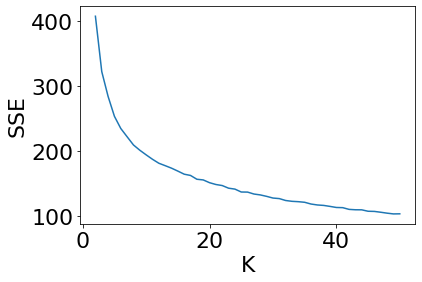

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8533986789444 silhouette =  0.2581035632721134

k =  6 SSE =  235.1523900177741 silhouette =  0.24504635730755422

k =  7 SSE =  222.54914998470807 silhouette =  0.24672390294925017

k =  8 SSE =  213.1282728108405 silhouette =  0.230313729473717

k =  9 SSE =  201.61412788952717 silhouette =  0.20304059107006617

k =  10 SSE =  194.0293568479641 silhouette =  0.20251615838449802

k =  11 SSE =  187.65410319015254 silhouette =  0.1997719283044815

k =  12 SSE =  183.55182215740106 silhouette =  0.18572390223832017

k =  13 SSE =  176.24374228720197 silhouette =  0.19778218278228488

k =  14 SSE =  172.87394700500968 silhouette =  0.19987776702735416

k =  15 SSE =  168.70536627178407 silhouette =  0.18370659857661628

k =  16 SSE =  165.646034705347 silhouette =  0.1714

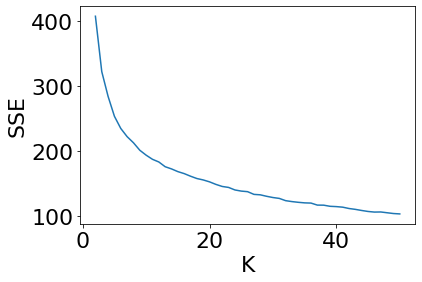

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.15158114495037 silhouette =  0.2437566182246464

k =  7 SSE =  222.34702837382994 silhouette =  0.23439296070375779

k =  8 SSE =  209.86303938251442 silhouette =  0.2380732893627431

k =  9 SSE =  201.4146233901456 silhouette =  0.239765854181866

k =  10 SSE =  193.4337655217195 silhouette =  0.20680580530104795

k =  11 SSE =  187.58758292905202 silhouette =  0.20115524596855652

k =  12 SSE =  181.75795125316176 silhouette =  0.2014675126706925

k =  13 SSE =  178.02113169374135 silhouette =  0.19692934087244565

k =  14 SSE =  173.059568703085 silhouette =  0.19828597960661942

k =  15 SSE =  168.91429505268505 silhouette =  0.16368445681323116

k =  16 SSE =  165.14378064564505 silhouette =  0.154402

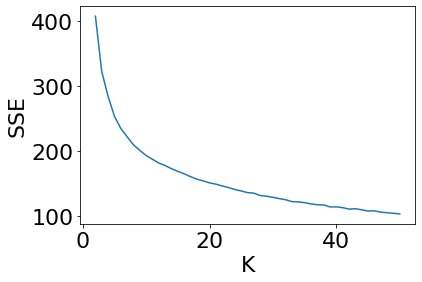

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.85225294168427 silhouette =  0.2574257838601987

k =  6 SSE =  235.15245325793205 silhouette =  0.2453547809761672

k =  7 SSE =  222.33513328479174 silhouette =  0.2326343101603477

k =  8 SSE =  209.81961516296528 silhouette =  0.23818645625791085

k =  9 SSE =  201.43003300097334 silhouette =  0.23777088460531703

k =  10 SSE =  193.24485009102736 silhouette =  0.20124813717746193

k =  11 SSE =  187.95823671217724 silhouette =  0.20271461142653993

k =  12 SSE =  181.9707324870348 silhouette =  0.19803978973815256

k =  13 SSE =  176.34166201785726 silhouette =  0.19912071367371081

k =  14 SSE =  174.18085516964615 silhouette =  0.17017027175044439

k =  15 SSE =  168.20678015209603 silhouette =  0.18163078705591698

k =  16 SSE =  166.00968595212018 silhouette =  

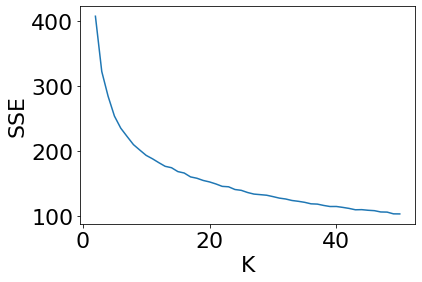

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  292.00880541852337 silhouette =  0.22461050752438705

k =  5 SSE =  253.87747379202526 silhouette =  0.25841080405341776

k =  6 SSE =  235.15158114495037 silhouette =  0.2437566182246464

k =  7 SSE =  222.34957392598838 silhouette =  0.23460097350118764

k =  8 SSE =  209.8079732818088 silhouette =  0.2402383829448228

k =  9 SSE =  201.48923779231197 silhouette =  0.23825770375475447

k =  10 SSE =  193.26031560074864 silhouette =  0.2011853262396367

k =  11 SSE =  188.33325820144907 silhouette =  0.20799317134897835

k =  12 SSE =  183.15467302012726 silhouette =  0.19102795472666426

k =  13 SSE =  177.8887767647155 silhouette =  0.17667555605095314

k =  14 SSE =  172.243466990707 silhouette =  0.188548969801692

k =  15 SSE =  168.35603044571346 silhouette =  0.18128279807282277

k =  16 SSE =  166.55292075863 silhouette =  0.180627

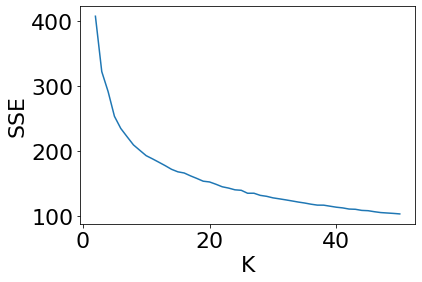

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.87747379202526 silhouette =  0.25841080405341776

k =  6 SSE =  235.15391092281124 silhouette =  0.2452852070816758

k =  7 SSE =  222.53307484344543 silhouette =  0.24864015414824744

k =  8 SSE =  209.8060338341788 silhouette =  0.23825639405994672

k =  9 SSE =  201.8349804187335 silhouette =  0.210655658757707

k =  10 SSE =  193.35194381576804 silhouette =  0.203219004777017

k =  11 SSE =  187.09368376987067 silhouette =  0.20298947688844127

k =  12 SSE =  182.01806568478892 silhouette =  0.1943491215594017

k =  13 SSE =  177.06643205519154 silhouette =  0.1928703468332431

k =  14 SSE =  173.6282731898747 silhouette =  0.18210504071596387

k =  15 SSE =  168.25819510037417 silhouette =  0.17298752410603677

k =  16 SSE =  163.88320131861386 silhouette =  0.1726

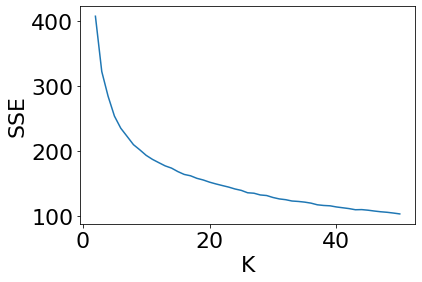

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.85505689337919 silhouette =  0.2582887391879656

k =  6 SSE =  235.21367570363466 silhouette =  0.2453142130109331

k =  7 SSE =  222.52838891030748 silhouette =  0.23643198308853966

k =  8 SSE =  209.80424975898055 silhouette =  0.24089747715366794

k =  9 SSE =  201.45031636690265 silhouette =  0.23902541536177233

k =  10 SSE =  195.38218715356146 silhouette =  0.2368048715418043

k =  11 SSE =  187.96615325531778 silhouette =  0.20268101239009084

k =  12 SSE =  183.07954023874552 silhouette =  0.20300655110929086

k =  13 SSE =  177.45655324593275 silhouette =  0.18090986824327246

k =  14 SSE =  172.51880495045066 silhouette =  0.19832289907461656

k =  15 SSE =  168.28766354372476 silhouette =  0.1926359487154497

k =  16 SSE =  164.19594626297373 silhouette =  

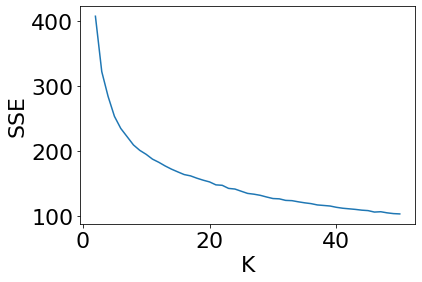

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  292.00880541852337 silhouette =  0.22461050752438705

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.15341627763834 silhouette =  0.24490477051543363

k =  7 SSE =  222.42940838924912 silhouette =  0.23322010815416452

k =  8 SSE =  209.8213892620853 silhouette =  0.24088967320578653

k =  9 SSE =  201.57220792504455 silhouette =  0.20599940231217556

k =  10 SSE =  193.2901284954735 silhouette =  0.20451159042503292

k =  11 SSE =  187.76350549512438 silhouette =  0.20327896184985114

k =  12 SSE =  181.26848397894958 silhouette =  0.20186883103919967

k =  13 SSE =  178.08296884671861 silhouette =  0.19410180138390115

k =  14 SSE =  173.6377098849384 silhouette =  0.17589124179098953

k =  15 SSE =  170.31197541785906 silhouette =  0.16897668868818083

k =  16 SSE =  164.53593068498319 silhouette =  0.

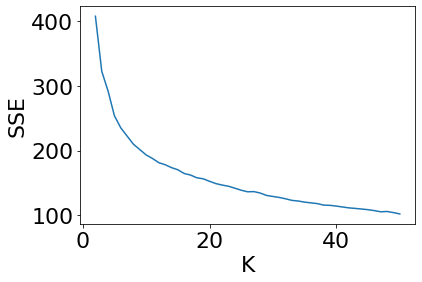

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.15391092281124 silhouette =  0.2452852070816758

k =  7 SSE =  223.48817023981545 silhouette =  0.23202542514576413

k =  8 SSE =  209.8390576888247 silhouette =  0.24146080158719135

k =  9 SSE =  202.34235886141897 silhouette =  0.23790536564311954

k =  10 SSE =  193.74281506425015 silhouette =  0.20547048122058262

k =  11 SSE =  187.5993703197659 silhouette =  0.19403776649845472

k =  12 SSE =  181.35314829420955 silhouette =  0.20282350671859364

k =  13 SSE =  177.1267416189925 silhouette =  0.19951344665962542

k =  14 SSE =  171.71512264043895 silhouette =  0.18327212317872033

k =  15 SSE =  169.5233369560996 silhouette =  0.16724007489749776

k =  16 SSE =  164.61560571688258 silhouette =  0.19

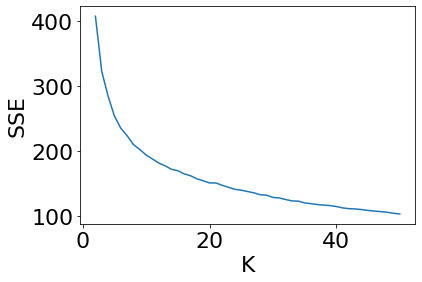

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.92120951014877 silhouette =  0.2562863748237707

k =  6 SSE =  235.1566939548737 silhouette =  0.24538538344488164

k =  7 SSE =  222.32942814604056 silhouette =  0.23451130292962866

k =  8 SSE =  209.80143203378728 silhouette =  0.23987389448031585

k =  9 SSE =  201.65628773174302 silhouette =  0.20183268323662606

k =  10 SSE =  193.30954353943847 silhouette =  0.20173985885991547

k =  11 SSE =  187.20683302593508 silhouette =  0.20122482719268675

k =  12 SSE =  182.04717331403066 silhouette =  0.20642303080677446

k =  13 SSE =  177.09910195612733 silhouette =  0.18807386666067272

k =  14 SSE =  172.80823267503592 silhouette =  0.1731354683404718

k =  15 SSE =  169.00050568154265 silhouette =  0.18217233479810718

k =  16 SSE =  164.3932642556875 silhouette =  

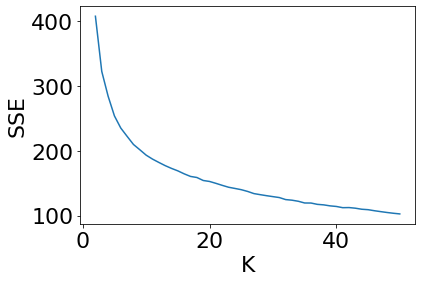

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.96595977069816 silhouette =  0.2541013006095809

k =  6 SSE =  235.15028028653418 silhouette =  0.24461047221889684

k =  7 SSE =  222.40568814441608 silhouette =  0.2327223512434349

k =  8 SSE =  213.15540875875465 silhouette =  0.22783621429915132

k =  9 SSE =  201.58360140642196 silhouette =  0.20219635031973693

k =  10 SSE =  193.94916038057323 silhouette =  0.1992469368704962

k =  11 SSE =  187.10982141545963 silhouette =  0.20546601509243842

k =  12 SSE =  181.2726407965012 silhouette =  0.20172608502814016

k =  13 SSE =  175.98456357129905 silhouette =  0.19849899900534496

k =  14 SSE =  173.03754405921765 silhouette =  0.17864985849991685

k =  15 SSE =  169.29673044451064 silhouette =  0.1844901419389964

k =  16 SSE =  165.16216895631737 silhouette =  0

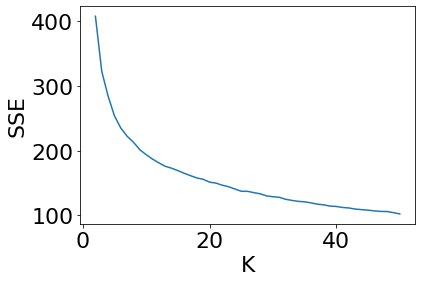

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.85505689337919 silhouette =  0.2582887391879656

k =  6 SSE =  235.15158114495037 silhouette =  0.2437566182246464

k =  7 SSE =  222.55061191531803 silhouette =  0.23508181923326088

k =  8 SSE =  214.14553568302094 silhouette =  0.1948244805018937

k =  9 SSE =  201.47266409460394 silhouette =  0.23804124162670887

k =  10 SSE =  193.24854101242295 silhouette =  0.20179027147630568

k =  11 SSE =  187.95146019673194 silhouette =  0.2083799986055827

k =  12 SSE =  181.96453681843343 silhouette =  0.1993206075672891

k =  13 SSE =  177.47013176498214 silhouette =  0.1924783864304022

k =  14 SSE =  172.55811467415285 silhouette =  0.19770326588948967

k =  15 SSE =  169.6131012206355 silhouette =  0.1873961246222437

k =  16 SSE =  165.6960258838245 silhouette =  0.170

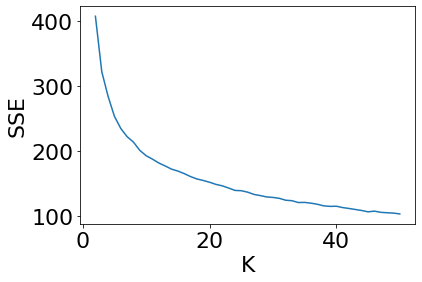

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.15138489672603 silhouette =  0.24455243999269413

k =  7 SSE =  222.3683978314654 silhouette =  0.23363583021351755

k =  8 SSE =  209.8110865061614 silhouette =  0.23860982430704694

k =  9 SSE =  201.50226512288287 silhouette =  0.23861652436553615

k =  10 SSE =  193.1979475413455 silhouette =  0.20118303281874209

k =  11 SSE =  189.32647187940472 silhouette =  0.18861889671651197

k =  12 SSE =  181.4282283611748 silhouette =  0.20083684222551362

k =  13 SSE =  177.08951693792724 silhouette =  0.18747346893362

k =  14 SSE =  172.89891240146576 silhouette =  0.1880929697643778

k =  15 SSE =  168.06405062992297 silhouette =  0.18222598686635472

k =  16 SSE =  165.1675007095383 silhouette =  0.172825

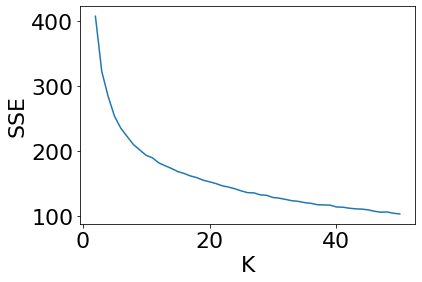

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.92120951014877 silhouette =  0.2562863748237707

k =  6 SSE =  235.15305316403004 silhouette =  0.24406874931727127

k =  7 SSE =  222.5584210594795 silhouette =  0.23586585797837775

k =  8 SSE =  213.13007762530336 silhouette =  0.22881440766181035

k =  9 SSE =  201.89282014718543 silhouette =  0.2100029541942241

k =  10 SSE =  193.18334147821918 silhouette =  0.20285476935295854

k =  11 SSE =  188.67178182941626 silhouette =  0.19955141057375494

k =  12 SSE =  183.43010662345728 silhouette =  0.1892036177010438

k =  13 SSE =  176.1584312541142 silhouette =  0.19866024877606084

k =  14 SSE =  173.406835615539 silhouette =  0.19512024282465096

k =  15 SSE =  169.92464607714518 silhouette =  0.15334783988845216

k =  16 SSE =  165.29158696731997 silhouette =  0.1

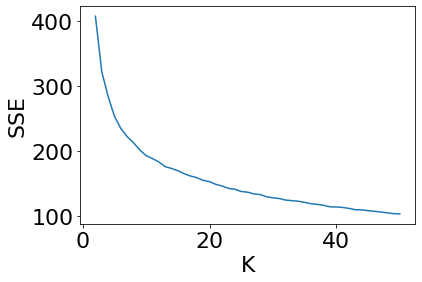

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.15158114495037 silhouette =  0.2437566182246464

k =  7 SSE =  222.61232831541116 silhouette =  0.24339760467683502

k =  8 SSE =  214.34748952852212 silhouette =  0.20315526228956848

k =  9 SSE =  201.74630908051657 silhouette =  0.20260156785064498

k =  10 SSE =  193.31550858033452 silhouette =  0.20644588572701777

k =  11 SSE =  187.5851217842569 silhouette =  0.20500988869684286

k =  12 SSE =  182.18931500133104 silhouette =  0.1972706173695842

k =  13 SSE =  178.92006096147298 silhouette =  0.18747836538529936

k =  14 SSE =  172.6508017714412 silhouette =  0.19705910214712197

k =  15 SSE =  170.98783197222684 silhouette =  0.17151187750111624

k =  16 SSE =  165.29992063002985 silhouette =  0.1

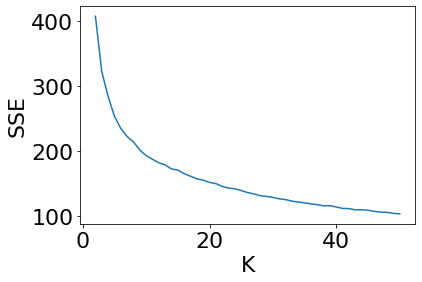

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.96802867118814 silhouette =  0.25473187009776316

k =  6 SSE =  235.15158114495037 silhouette =  0.2437566182246464

k =  7 SSE =  222.49131124234574 silhouette =  0.2484722086684543

k =  8 SSE =  213.1209368757236 silhouette =  0.23095947534557562

k =  9 SSE =  201.56286088354 silhouette =  0.20125055822108473

k =  10 SSE =  196.27033837853716 silhouette =  0.20280982020032007

k =  11 SSE =  187.32728166160453 silhouette =  0.2018654320162308

k =  12 SSE =  181.83278923004488 silhouette =  0.20507251382695038

k =  13 SSE =  177.22753976645396 silhouette =  0.1951882511820467

k =  14 SSE =  174.0505776809901 silhouette =  0.19653268028368107

k =  15 SSE =  168.84307960691254 silhouette =  0.16539996997347628

k =  16 SSE =  164.63777877673473 silhouette =  0.183

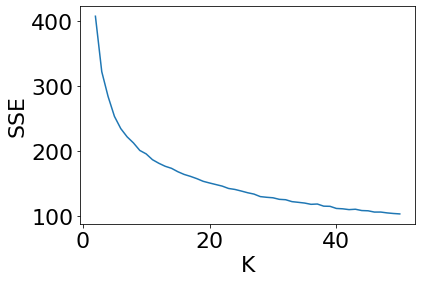

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.85225294168427 silhouette =  0.2574257838601987

k =  6 SSE =  235.15158114495037 silhouette =  0.2437566182246464

k =  7 SSE =  222.48263547344976 silhouette =  0.24934780453630892

k =  8 SSE =  209.91721983693265 silhouette =  0.24077764918065667

k =  9 SSE =  201.56381445603438 silhouette =  0.20513462621923392

k =  10 SSE =  193.50859484902332 silhouette =  0.20460561351086687

k =  11 SSE =  187.40336483676433 silhouette =  0.19582134592297112

k =  12 SSE =  182.03121217100983 silhouette =  0.20001419546433272

k =  13 SSE =  178.12671439926993 silhouette =  0.18139125443878287

k =  14 SSE =  172.7622123227851 silhouette =  0.17219850592937305

k =  15 SSE =  169.5685137515928 silhouette =  0.1772131708098485

k =  16 SSE =  165.96683849406156 silhouette =  0

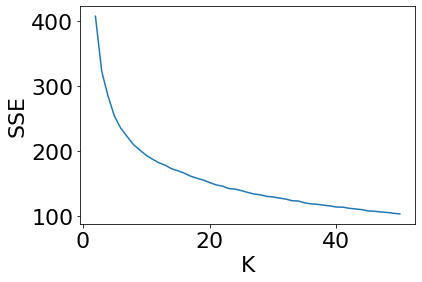

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8787510259347 silhouette =  0.25877654555620566

k =  6 SSE =  235.15305316403004 silhouette =  0.24406874931727127

k =  7 SSE =  222.5285910502878 silhouette =  0.24662867937171942

k =  8 SSE =  214.28455821980165 silhouette =  0.20394807114046923

k =  9 SSE =  201.7095889024661 silhouette =  0.2015463198373103

k =  10 SSE =  193.28513460841302 silhouette =  0.20298318262088572

k =  11 SSE =  188.82167448040792 silhouette =  0.19680462009359062

k =  12 SSE =  181.2497120930353 silhouette =  0.20276587191226686

k =  13 SSE =  177.61749056287337 silhouette =  0.19587779606159766

k =  14 SSE =  172.53694816753776 silhouette =  0.1863428560797847

k =  15 SSE =  170.09759984270195 silhouette =  0.16116210043109733

k =  16 SSE =  164.67249210094695 silhouette =  0.

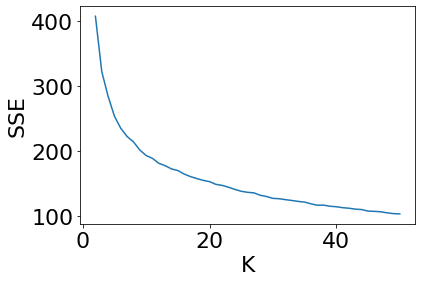

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.87747379202526 silhouette =  0.25841080405341776

k =  6 SSE =  235.15245325793205 silhouette =  0.2453547809761672

k =  7 SSE =  222.42007332081573 silhouette =  0.23310548467025424

k =  8 SSE =  209.84787449870765 silhouette =  0.23878374095797839

k =  9 SSE =  201.58944681495117 silhouette =  0.2059932183525377

k =  10 SSE =  193.23226384124575 silhouette =  0.20376721349118554

k =  11 SSE =  188.97170212204927 silhouette =  0.18546897005047264

k =  12 SSE =  181.4837239600224 silhouette =  0.19934310259338034

k =  13 SSE =  178.6670842927293 silhouette =  0.1972962815494286

k =  14 SSE =  173.24047542674472 silhouette =  0.19200277842039995

k =  15 SSE =  170.1810881550711 silhouette =  0.152451931131802

k =  16 SSE =  166.0960478287931 silhouette =  0.165

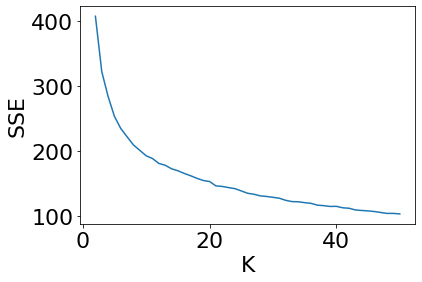

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  292.00880541852337 silhouette =  0.22461050752438705

k =  5 SSE =  253.8583718783118 silhouette =  0.258200201663266

k =  6 SSE =  235.15158114495037 silhouette =  0.2437566182246464

k =  7 SSE =  222.62681334104442 silhouette =  0.23301343465774088

k =  8 SSE =  209.88770458508282 silhouette =  0.23935027227510217

k =  9 SSE =  203.0342488155945 silhouette =  0.20354474987380552

k =  10 SSE =  197.64015364209433 silhouette =  0.22250019566302914

k =  11 SSE =  187.0723493685908 silhouette =  0.20187481104079913

k =  12 SSE =  183.12141550260992 silhouette =  0.20398570275126662

k =  13 SSE =  177.106166277839 silhouette =  0.19605423403304165

k =  14 SSE =  173.93054010665298 silhouette =  0.19094274365352712

k =  15 SSE =  168.6050818972609 silhouette =  0.18810246631267447

k =  16 SSE =  164.96267862945106 silhouette =  0.182

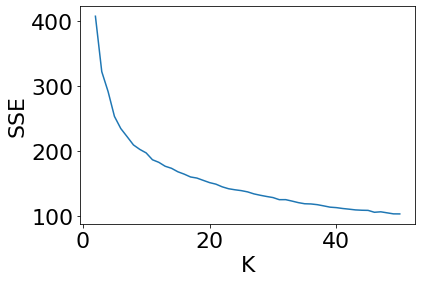

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.86696714497248 silhouette =  0.2572656510055693

k =  6 SSE =  235.15341627763834 silhouette =  0.24490477051543363

k =  7 SSE =  222.35018420516514 silhouette =  0.23465412149730563

k =  8 SSE =  209.88113407768233 silhouette =  0.23895043533441884

k =  9 SSE =  201.50032672517972 silhouette =  0.23836065803481232

k =  10 SSE =  193.2141136139517 silhouette =  0.2046055249296612

k =  11 SSE =  187.66609334233718 silhouette =  0.19967651258589383

k =  12 SSE =  182.2266225052776 silhouette =  0.1946411003981255

k =  13 SSE =  176.92466719357034 silhouette =  0.18598311530266012

k =  14 SSE =  173.44029752202394 silhouette =  0.17103340088514446

k =  15 SSE =  170.50011507566592 silhouette =  0.1521940167823645

k =  16 SSE =  165.22505894608835 silhouette =  0.

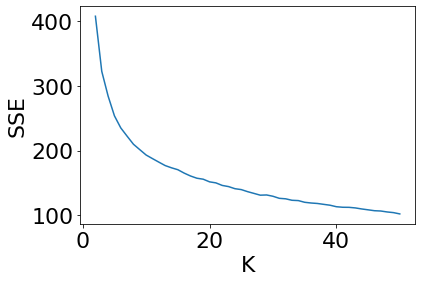

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.8511421017981 silhouette =  0.2580574426860805

k =  6 SSE =  235.27794872793356 silhouette =  0.2409144250310434

k =  7 SSE =  222.32942814604056 silhouette =  0.23451130292962866

k =  8 SSE =  209.8714964474455 silhouette =  0.2397386513443422

k =  9 SSE =  201.41179940730692 silhouette =  0.23773674616873386

k =  10 SSE =  194.6153574480897 silhouette =  0.2032089280565699

k =  11 SSE =  187.2750024259909 silhouette =  0.20060577692424483

k =  12 SSE =  181.4280180062902 silhouette =  0.20311557645733672

k =  13 SSE =  176.70016825397897 silhouette =  0.19952453890050298

k =  14 SSE =  171.88973501573196 silhouette =  0.1982023914201324

k =  15 SSE =  168.49115099728613 silhouette =  0.18093778346092976

k =  16 SSE =  163.95483669060044 silhouette =  0.1639

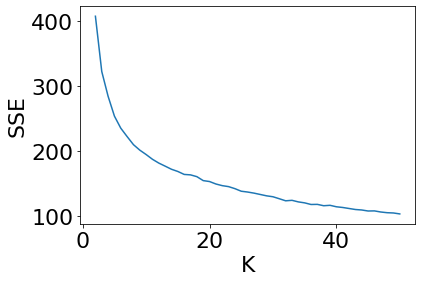

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.87747379202526 silhouette =  0.25841080405341776

k =  6 SSE =  235.27740886901393 silhouette =  0.2403683197416424

k =  7 SSE =  222.4878615878575 silhouette =  0.23228081794301197

k =  8 SSE =  209.81692551218774 silhouette =  0.24059556676941551

k =  9 SSE =  201.44906704496475 silhouette =  0.23725391994895395

k =  10 SSE =  193.2765489087283 silhouette =  0.21023073578680246

k =  11 SSE =  187.61345896599494 silhouette =  0.20220538911677927

k =  12 SSE =  183.63992384165002 silhouette =  0.18488154269024354

k =  13 SSE =  178.61933078220898 silhouette =  0.190326551743949

k =  14 SSE =  173.23332605449633 silhouette =  0.16981289583758583

k =  15 SSE =  169.47424309837007 silhouette =  0.1939647159589354

k =  16 SSE =  165.08586006141138 silhouette =  0.

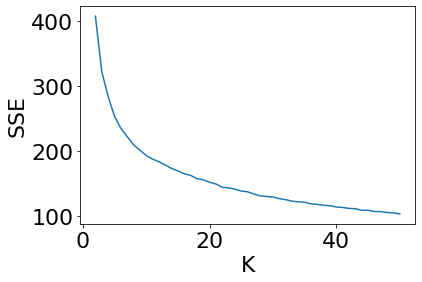

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.88839414375911 silhouette =  0.256987123514995

k =  6 SSE =  235.15391092281124 silhouette =  0.2452852070816758

k =  7 SSE =  222.33559319539103 silhouette =  0.23520721728644697

k =  8 SSE =  209.81193970730033 silhouette =  0.24072833383133033

k =  9 SSE =  203.5533871434745 silhouette =  0.1955868270332666

k =  10 SSE =  194.55844097475082 silhouette =  0.19581388876329076

k =  11 SSE =  187.55340544727602 silhouette =  0.19375685117659067

k =  12 SSE =  183.5638988523515 silhouette =  0.1885557610345307

k =  13 SSE =  179.20982993677202 silhouette =  0.17085730476608674

k =  14 SSE =  172.42989470432138 silhouette =  0.18652337300174443

k =  15 SSE =  167.72826924146375 silhouette =  0.1816928226425723

k =  16 SSE =  164.77584187416073 silhouette =  0.17

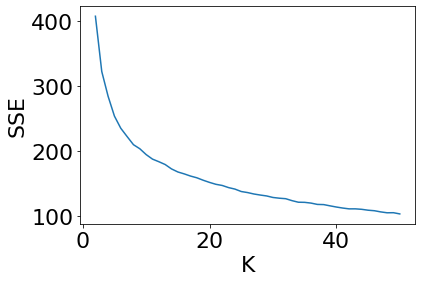

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.9807611008317 silhouette =  0.2575965337529282

k =  6 SSE =  235.15341627763834 silhouette =  0.24490477051543363

k =  7 SSE =  222.32942814604056 silhouette =  0.23451130292962866

k =  8 SSE =  209.80628028875506 silhouette =  0.23829645353847362

k =  9 SSE =  201.68703820211465 silhouette =  0.20416557832196855

k =  10 SSE =  193.2080129748179 silhouette =  0.20048500721567095

k =  11 SSE =  187.16748611004726 silhouette =  0.20100665648592425

k =  12 SSE =  181.23601096299677 silhouette =  0.20130967693323767

k =  13 SSE =  177.92164462094627 silhouette =  0.20349583861778883

k =  14 SSE =  172.52781002770243 silhouette =  0.17814024727223632

k =  15 SSE =  168.77217511718814 silhouette =  0.18842562834642046

k =  16 SSE =  164.7236332828517 silhouette =  

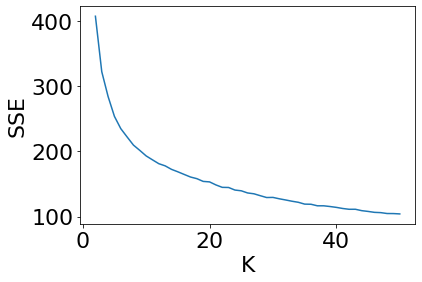

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  284.48102539255575 silhouette =  0.39567299874473555

k =  5 SSE =  253.85505689337919 silhouette =  0.2582887391879656

k =  6 SSE =  235.21367570363466 silhouette =  0.2453142130109331

k =  7 SSE =  226.97467970047413 silhouette =  0.20492051435858788

k =  8 SSE =  209.91067447944639 silhouette =  0.24064368834814454

k =  9 SSE =  201.55913961136997 silhouette =  0.20214689530462218

k =  10 SSE =  196.2440103278676 silhouette =  0.20222462324275983

k =  11 SSE =  188.90573149983794 silhouette =  0.1875716080733182

k =  12 SSE =  183.56596593268154 silhouette =  0.1903245477274502

k =  13 SSE =  177.18120132930287 silhouette =  0.195506368274608

k =  14 SSE =  172.52340232635078 silhouette =  0.18670285812802215

k =  15 SSE =  168.1836819071702 silhouette =  0.19862905182094662

k =  16 SSE =  164.8536055541688 silhouette =  0.166

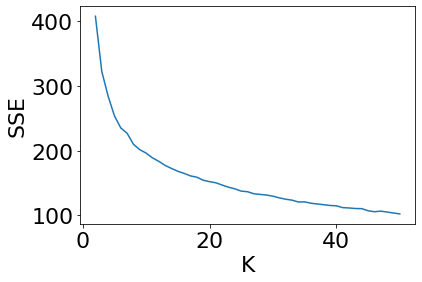

k =  2 SSE =  407.9973812343198 silhouette =  0.3561652561386753

k =  3 SSE =  322.74209432260153 silhouette =  0.36878907118452303

k =  4 SSE =  292.00880541852337 silhouette =  0.22461050752438705

k =  5 SSE =  253.8511421017981 silhouette =  0.2580574426860805

k =  6 SSE =  235.15158114495037 silhouette =  0.2437566182246464

k =  7 SSE =  222.47996978763194 silhouette =  0.23375485627573564

k =  8 SSE =  209.86397647485242 silhouette =  0.2387765836837375

k =  9 SSE =  201.4052286047534 silhouette =  0.2406508117863376

k =  10 SSE =  193.34257400161394 silhouette =  0.20277345676917985

k =  11 SSE =  187.32558877882812 silhouette =  0.20882189015122676

k =  12 SSE =  181.85925703325452 silhouette =  0.2038389437529403

k =  13 SSE =  178.91961802848238 silhouette =  0.1812836849106015

k =  14 SSE =  173.0002985849709 silhouette =  0.1941132613952641

k =  15 SSE =  169.7571488345319 silhouette =  0.16881655631909664

k =  16 SSE =  165.77942547338398 silhouette =  0.16762

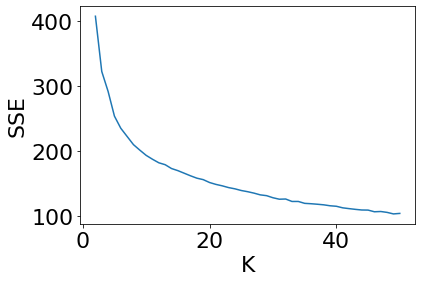

In [158]:
for i in range(0, 50):
    sse_list = list()
    max_k = 50
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300)
        kmeans.fit(train_data)
        sse = kmeans.inertia_
        sse_list.append(sse)

        print("k = ", k, "SSE = ", sse, "silhouette = ", silhouette_score(train_data, kmeans.labels_))
        print()
        
    plt.plot(range(2, len(sse_list) + 2), sse_list)
    plt.ylabel('SSE', fontsize=22)
    plt.xlabel('K', fontsize=22)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.show()

From the data it appears that the best value of k is 5.

Then we run the k_means again by initializing the value of n_clusters to 5.

In [159]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', n_init=1000, max_iter=10000)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print ('centers', kmeans.cluster_centers_)
print()
print ('labels', dict(zip(bins, hist)))
print ('sse', kmeans.inertia_)
print ('silhouette', silhouette_score(train_data, kmeans.labels_))

centers [[ 1.38777878e-16 -1.11022302e-16  4.83568075e-01  4.59988356e-01
   2.62408219e-01  4.64788732e-01  3.37558685e-01  4.35054773e-01
   4.20774648e-01]
 [ 2.77555756e-16  2.77555756e-16  4.21536797e-01  3.21365935e-01
   2.07143463e-01  9.80113636e-02  2.90198864e-01  4.54545455e-01
   1.60866477e-01]
 [-8.32667268e-17  1.00000000e+00  4.31601732e-01  3.48811512e-01
   2.23233567e-01  2.93939394e-01  3.07575758e-01  4.82828283e-01
   2.83712121e-01]
 [ 1.00000000e+00  5.55111512e-17  4.42270059e-01  3.84290537e-01
   2.28372526e-01  1.47260274e-01  3.48630137e-01  3.56164384e-01
   1.57534247e-01]
 [ 1.00000000e+00  1.00000000e+00  4.40178571e-01  3.58997858e-01
   2.36840080e-01  1.28125000e-01  3.63125000e-01  3.87500000e-01
   1.46875000e-01]]

labels {0: 213, 1: 352, 2: 165, 3: 73, 4: 80}
sse 253.8511421017981
silhouette 0.2580574426860805


In [160]:
diz_kmeans_1 = {int(i): np.where(kmeans.labels_ == int(i))[0].tolist() for i in range(kmeans.n_clusters)}
diz_kmeans_1['labels'] = {int(a): int(b) for a, b in zip(bins, hist)}
diz_kmeans_1['centers'] = [i.tolist() for i in kmeans.cluster_centers_]
diz_kmeans_1['sse'] = float(kmeans.inertia_)
diz_kmeans_1['silhouette'] = float(silhouette_score(train_data, kmeans.labels_))

In [161]:
with open('diz_kmeans_1.json', 'w') as fp:
    json.dump(diz_kmeans_1, fp, indent=4)

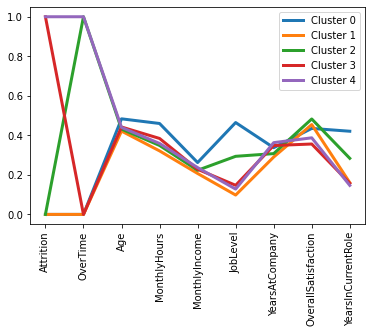

In [169]:
for i in range(0, 5):
    plt.plot(range(0, 9), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=3)
    
plt.xticks(range(0, 9), list(df_copy.columns), rotation = 90)
plt.legend()
plt.show()

In [170]:
df_clusters_1 = df_copy.copy()

In [171]:
df_clusters_1['Labels'] = kmeans.labels_

In [172]:
df_clusters_1

,Attrition,OverTime,Age,MonthlyHours,MonthlyIncome,JobLevel,YearsAtCompany,OverallSatisfaction,YearsInCurrentRole,Labels
0,0.0,0.0,0.809524,0.231122,0.286171,0.50,0.40,0.333333,0.4375,0
1,0.0,1.0,0.428571,0.233476,0.147183,1.00,0.05,0.333333,0.5000,2
2,0.0,1.0,0.166667,0.747017,0.144644,0.25,0.05,0.666667,0.3125,2
3,0.0,0.0,0.357143,0.435214,0.068878,0.00,0.15,0.333333,0.4375,1
4,0.0,0.0,0.309524,0.142192,0.204325,0.00,0.50,0.666667,0.1250,1
...,...,...,...,...,...,...,...,...,...,...
878,1.0,0.0,0.476190,0.453907,0.166769,0.00,0.50,0.666667,0.0000,3
879,0.0,1.0,0.452381,0.088947,0.042558,0.00,0.85,0.666667,0.0000,2
880,1.0,1.0,0.357143,0.436931,0.159227,0.25,0.55,0.333333,0.4375,4
881,0.0,0.0,0.357143,0.323273,0.057373,0.25,0.15,0.333333,0.1250,1


In [173]:
df_clusters_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Attrition            883 non-null    float64
 1   OverTime             883 non-null    float64
 2   Age                  883 non-null    float64
 3   MonthlyHours         883 non-null    float64
 4   MonthlyIncome        883 non-null    float64
 5   JobLevel             883 non-null    float64
 6   YearsAtCompany       883 non-null    float64
 7   OverallSatisfaction  883 non-null    float64
 8   YearsInCurrentRole   883 non-null    float64
 9   Labels               883 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 65.7 KB


In [174]:
np.unique(df_clusters_1['Labels'])

array([0, 1, 2, 3, 4], dtype=int32)

In [175]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([213, 352, 165,  73,  80]))

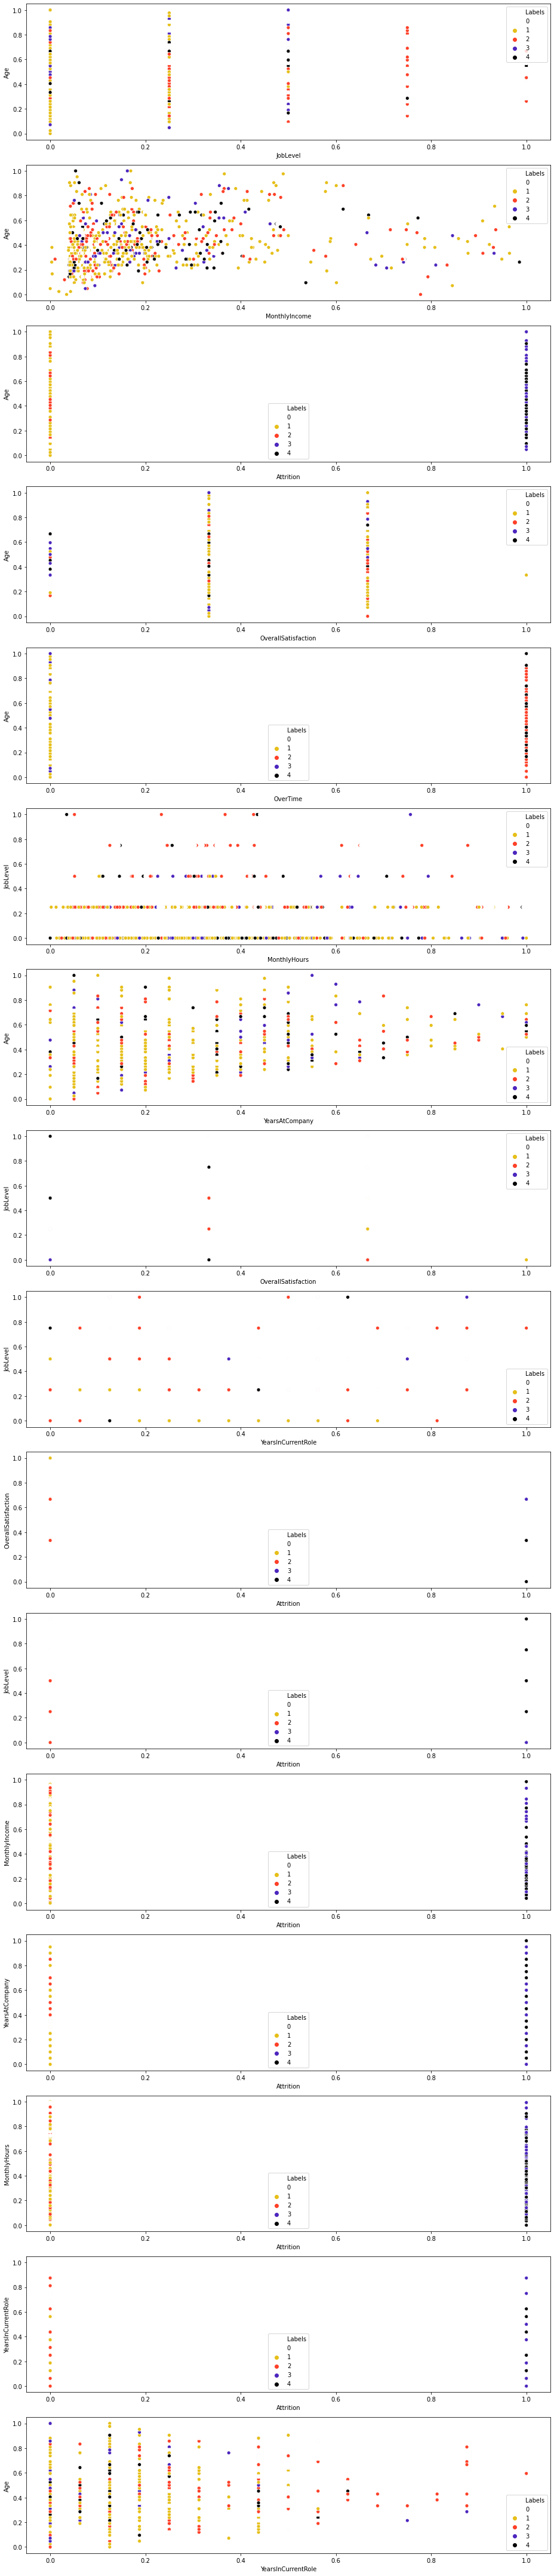

In [177]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, 
      ax11, ax12, ax13, ax14, ax15, ax16) = plt.subplots(16, 1, figsize = (13,60))

sns.scatterplot(x = 'JobLevel', y = 'Age', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax1)

sns.scatterplot(x = 'MonthlyIncome', y = 'Age', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax2)

sns.scatterplot(x = 'Attrition', y = 'Age', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax3)

sns.scatterplot(x = 'OverallSatisfaction', y = 'Age', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax4)

sns.scatterplot(x = 'OverTime', y = 'Age', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax5)

sns.scatterplot(x = 'MonthlyHours', y = 'JobLevel', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax6)

sns.scatterplot(x = 'YearsAtCompany', y = 'Age', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax7)

sns.scatterplot(x = 'OverallSatisfaction', y = 'JobLevel', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax8)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'JobLevel', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax9)

sns.scatterplot(x = 'Attrition', y = 'OverallSatisfaction', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax10)

sns.scatterplot(x = 'Attrition', y = 'JobLevel', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax11)

sns.scatterplot(x = 'Attrition', y = 'MonthlyIncome', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax12)

sns.scatterplot(x = 'Attrition', y = 'YearsAtCompany', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax13)

sns.scatterplot(x = 'Attrition', y = 'MonthlyHours', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax14)

sns.scatterplot(x = 'Attrition', y = 'YearsInCurrentRole', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax15)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'Age', data = df_clusters_1, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax16)

plt.tight_layout()
plt.show()

<h3>Non normalized dataset for centroid conversion</h3>

In [295]:
scaler = MinMaxScaler()

In [302]:
df_NON_normalized = pd.read_csv("Numerical_NON_NORMALIZED_Train_HR_Employee_Attrition.csv")

In [303]:
df_NON_normalized_reduct = pd.DataFrame()

col_to_add = ['Attrition', 'OverTime', 'Age', 'MonthlyHours', 'MonthlyIncome', 'JobLevel', 'YearsAtCompany', 
                'OverallSatisfaction', 'YearsInCurrentRole']

for element in col_to_add:
    df_NON_normalized_reduct[element] = df_NON_normalized[element]
    
df_NON_normalized_reduct

,Attrition,OverTime,Age,MonthlyHours,MonthlyIncome,JobLevel,YearsAtCompany,OverallSatisfaction,YearsInCurrentRole
0,0,0,52,156.61,8446,3,8,2,7
1,0,1,36,157.94,4834,5,1,2,8
2,0,1,25,448.06,4768,2,1,3,5
3,0,0,33,271.91,2799,1,3,2,7
4,0,0,31,106.37,6319,1,10,3,2
...,...,...,...,...,...,...,...,...,...
878,1,0,38,282.47,5343,1,10,3,0
879,0,1,37,76.29,2115,1,17,3,0
880,1,1,33,272.88,5147,2,11,2,7
881,0,0,33,208.67,2500,2,3,2,2


In [304]:
X = scaler.fit_transform(df_NON_normalized_reduct.values)

In [305]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

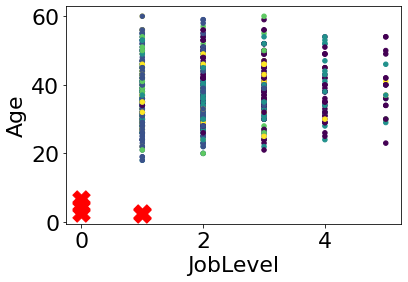

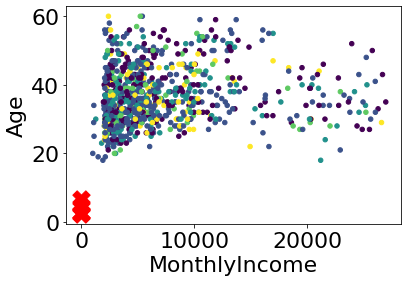

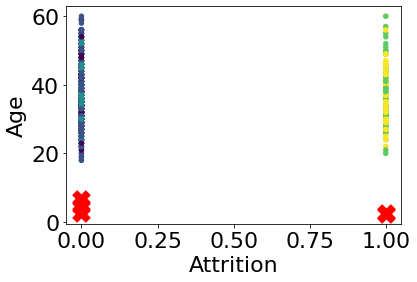

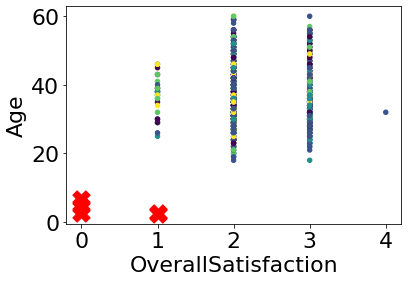

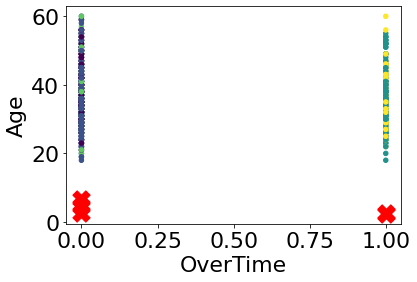

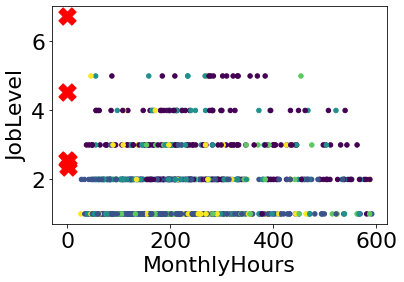

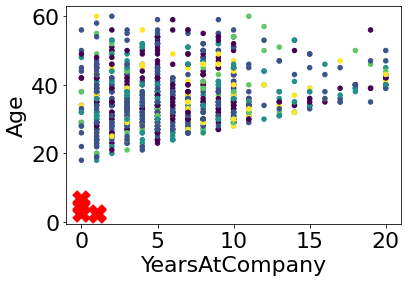

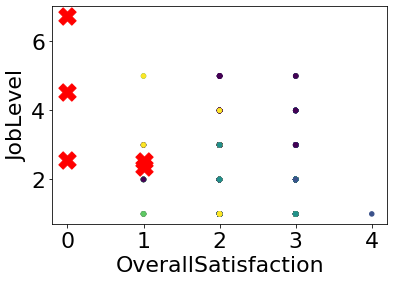

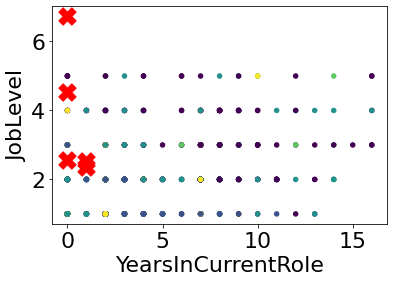

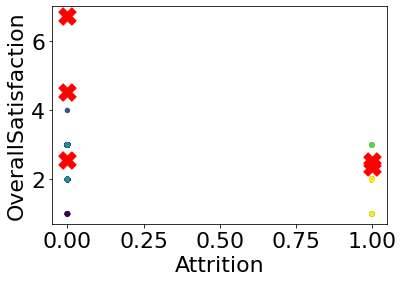

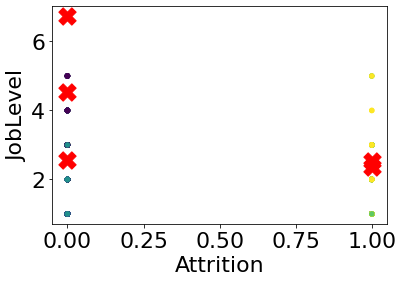

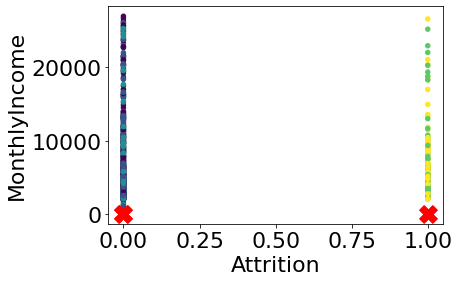

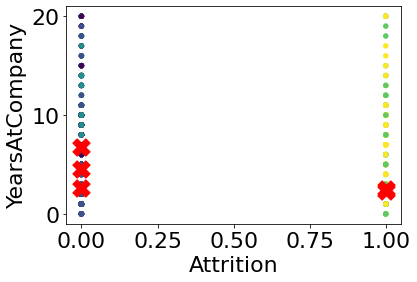

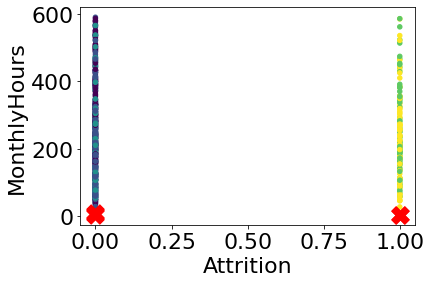

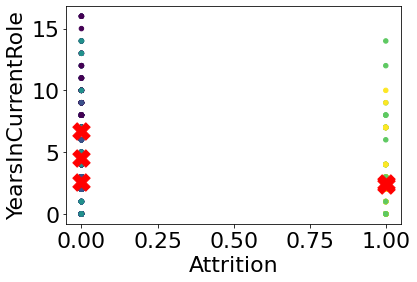

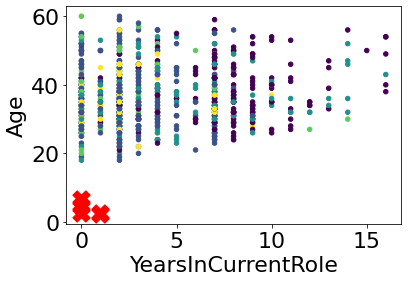

In [307]:
features_to_plot = [('JobLevel', 'Age'), ('MonthlyIncome', 'Age'), ('Attrition','Age'), ('OverallSatisfaction', 'Age'),
                   ('OverTime', 'Age'), ('MonthlyHours', 'JobLevel'), ('YearsAtCompany', 'Age'), ('OverallSatisfaction', 'JobLevel'),
                   ('YearsInCurrentRole', 'JobLevel'), ('Attrition', 'OverallSatisfaction'), ('Attrition', 'JobLevel'), ('Attrition', 'MonthlyIncome'),
                   ('Attrition', 'YearsAtCompany'), ('Attrition', 'MonthlyHours'), ('Attrition', 'YearsInCurrentRole'), ('YearsInCurrentRole', 'Age')]

for a, b in features_to_plot:
    plt.scatter(df_NON_normalized_reduct[a], df_NON_normalized_reduct[b], c=kmeans.labels_, 
                s=20)
    plt.scatter(centers[:, 0], centers[:, 8], s=300, marker='X', c='r')
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.xlabel(a, fontsize=22)
    plt.ylabel(b, fontsize=22)
    plt.show()

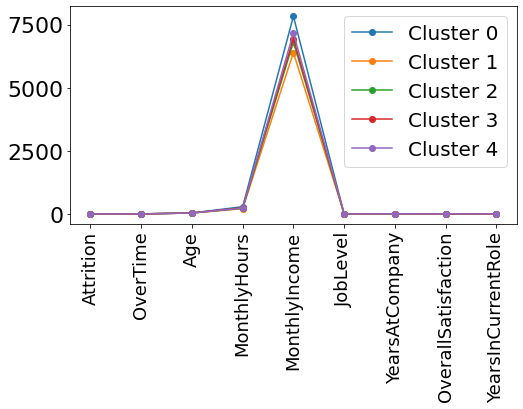

In [310]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
    
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_copy.columns)), df_copy.columns, fontsize=18, rotation = 90)
plt.legend(fontsize=20)
plt.show()

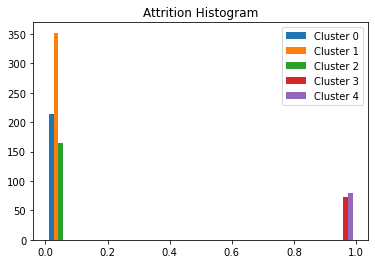

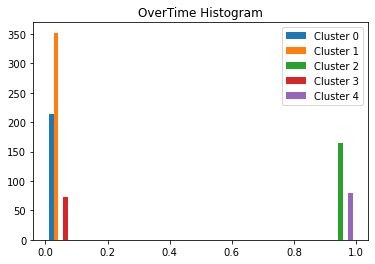

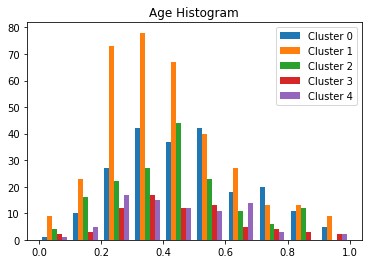

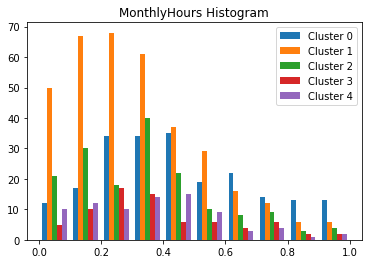

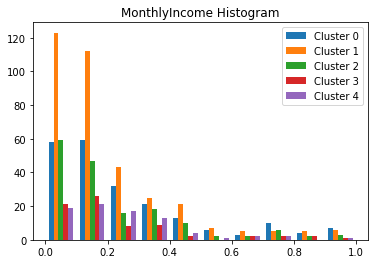

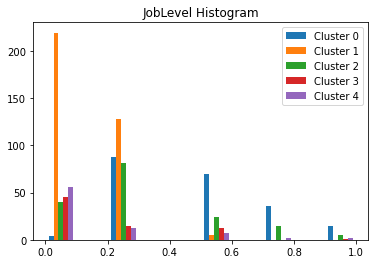

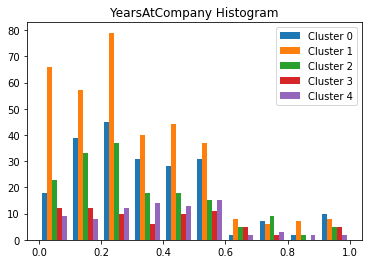

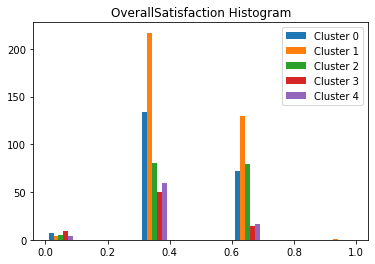

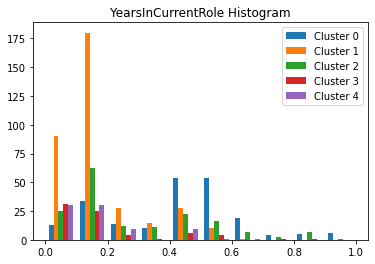

In [254]:
for column in df_copy.columns:
    
    cluster_list = []
    list_num_cluster = []
    
    for num_cluster in np.unique(df_clusters_1['Labels']):
        cluster_list.append(df_clusters_1[df_clusters_1['Labels'] == num_cluster][column])  #distribution
        list_num_cluster.append('Cluster %s' % num_cluster)                                 #num cluster
           
    plt.hist(cluster_list, label = list_num_cluster)
    plt.legend(loc='upper right')
    plt.title(column + " Histogram")               
    plt.show()

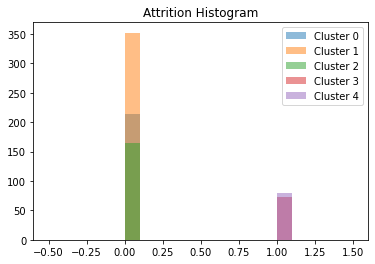

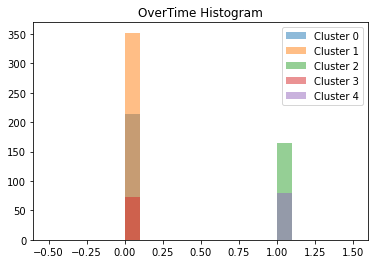

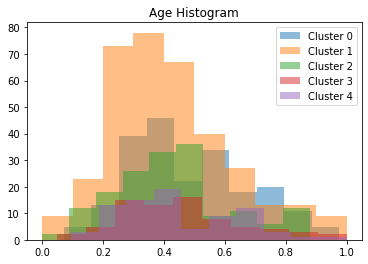

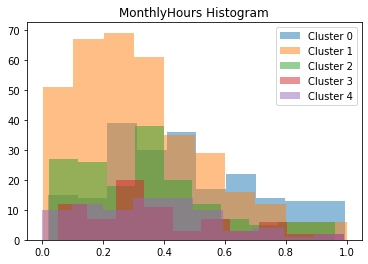

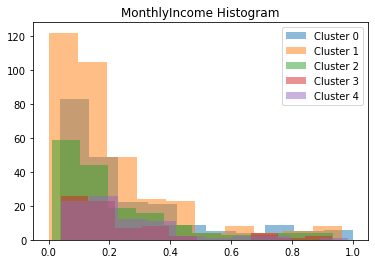

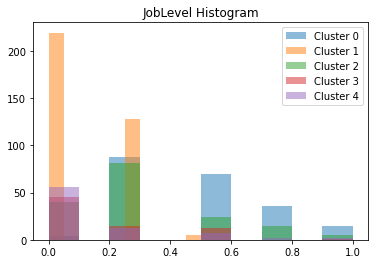

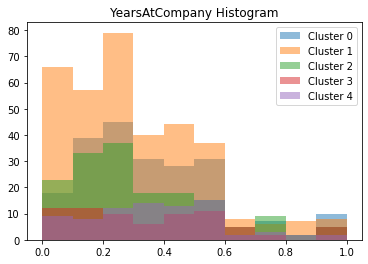

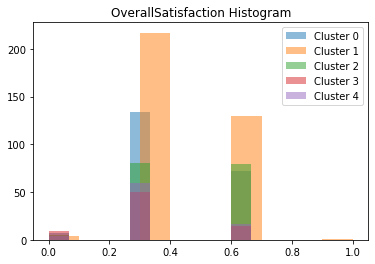

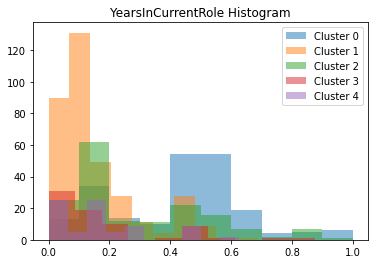

In [290]:
for column in df_copy.columns:
    
    for num_cluster in np.unique(df_clusters_1['Labels']):
        plt.hist(df_clusters_1[df_clusters_1['Labels'] == num_cluster][column], 
                 alpha = 0.5, label = 'Cluster %s' % num_cluster)       
    
    plt.legend(loc='upper right')
    plt.title(column + " Histogram")               
    plt.show()

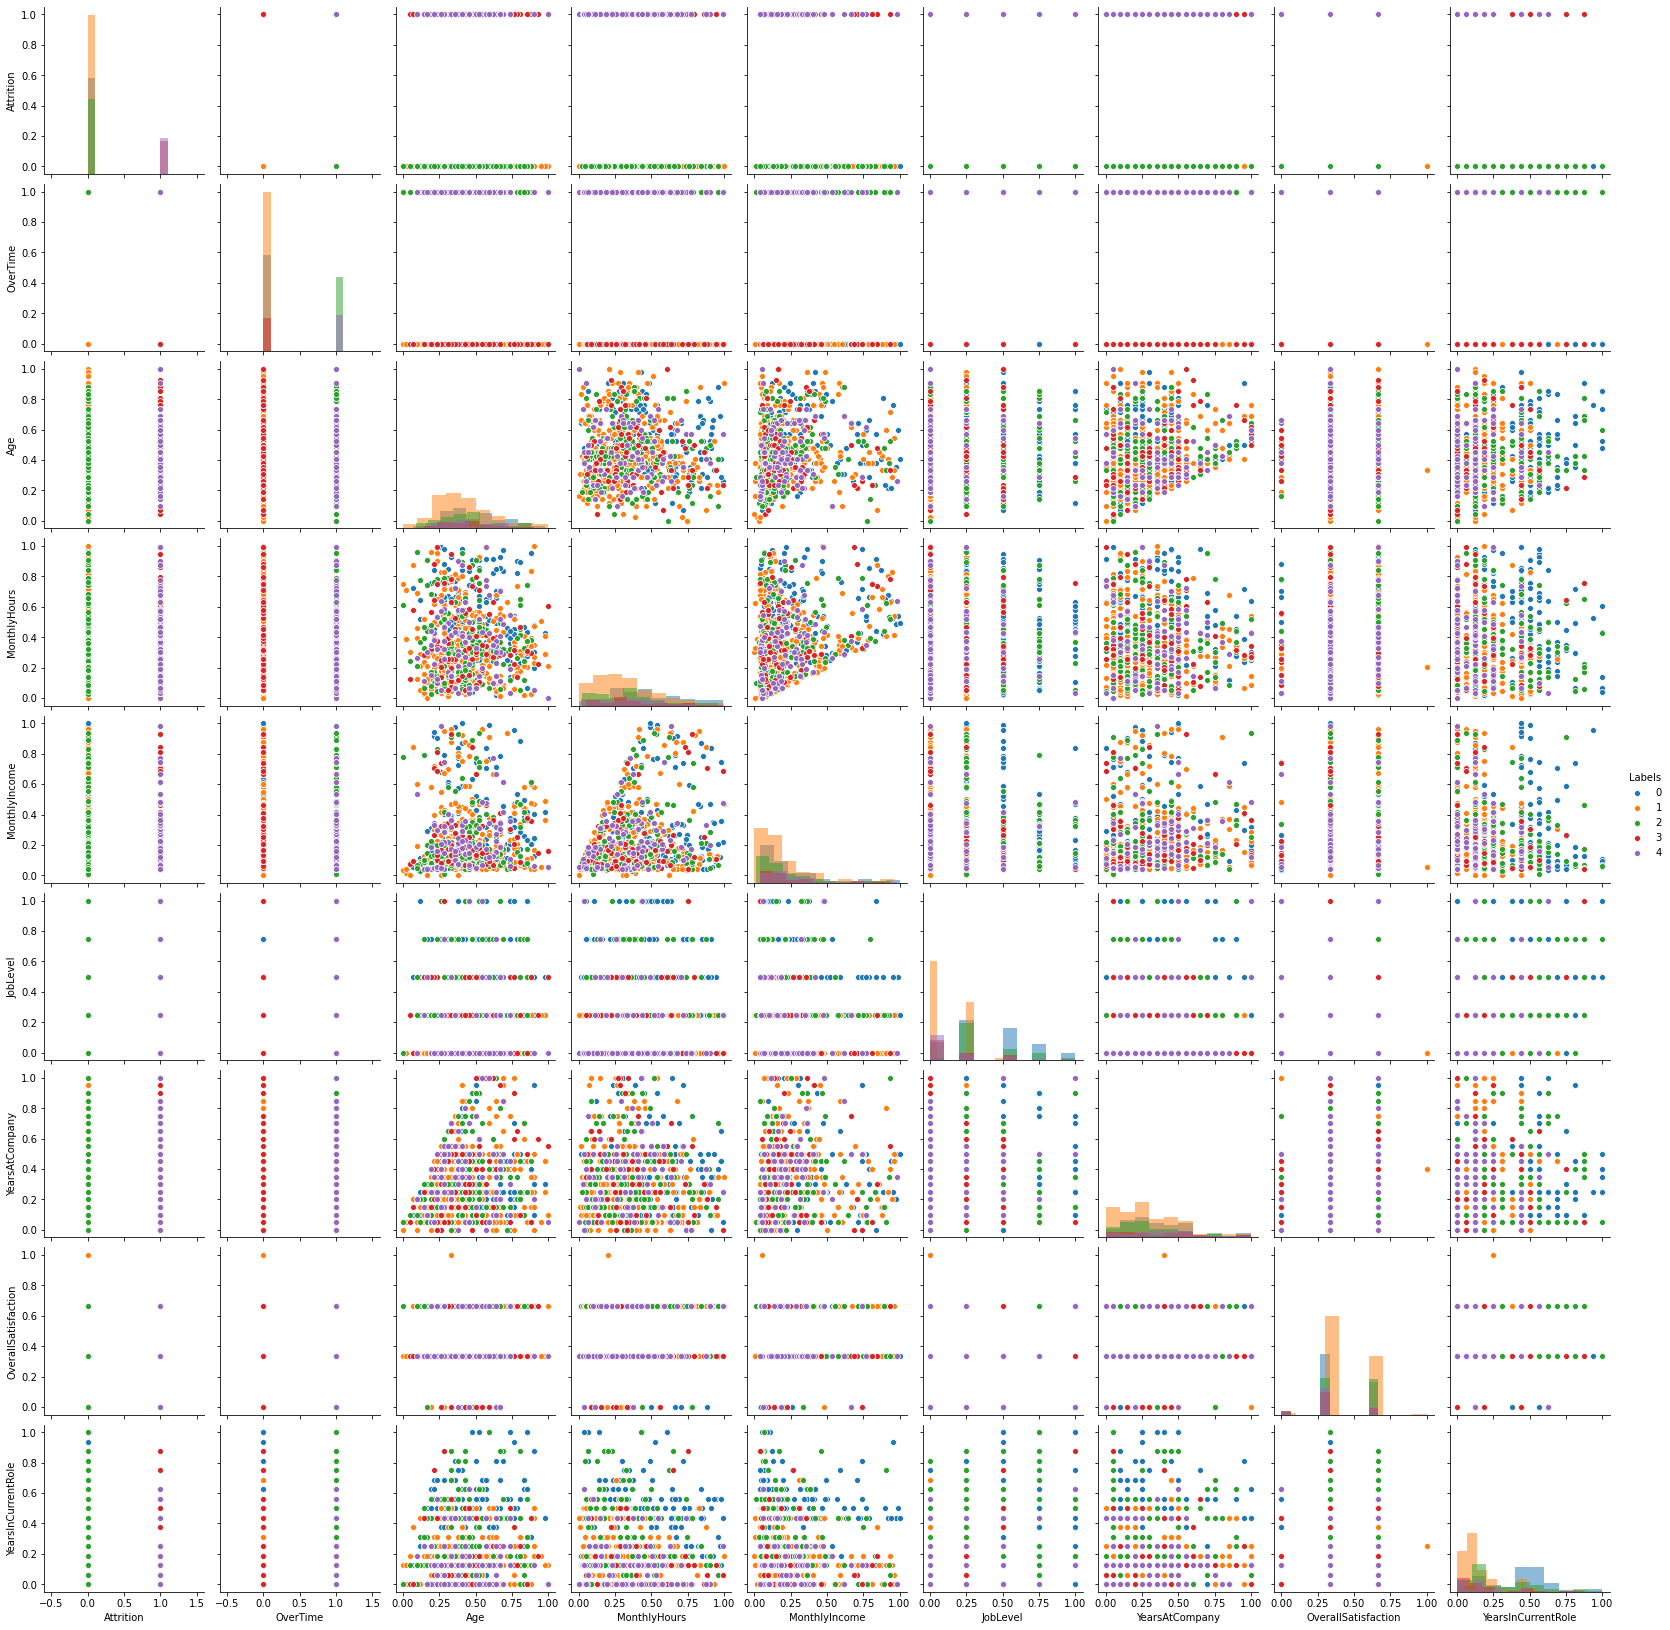

In [293]:
sns.pairplot(df_clusters_1, hue="Labels", diag_kws={'alpha':0.5}, diag_kind="hist")